<a href="https://colab.research.google.com/github/prerana1008/-Intrusion-Detection-System/blob/main/Final_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from multiprocessing import Pool

# Mount Google Drive
drive.mount('/content/drive')

# Load datasets
train_df = pd.read_csv('/content/drive/MyDrive/DATASET/merged_training_data.csv', low_memory=False)
test_df = pd.read_csv('/content/drive/MyDrive/DATASET/merged_testing_data.csv', low_memory=False)

# --- Data Cleaning ---
# Strip whitespace from column names
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

# Convert 'Label' column to string type
train_df['Label'] = train_df['Label'].astype(str)
test_df['Label'] = test_df['Label'].astype(str)

# Remove duplicate columns
train_df = train_df.loc[:, ~train_df.columns.duplicated()]
test_df = test_df.loc[:, ~test_df.columns.duplicated()]

# Convert all string columns to lowercase and strip whitespace
for df in [train_df, test_df]:
    str_cols = df.select_dtypes(include=['object']).columns
    df[str_cols] = df[str_cols].apply(lambda x: x.str.strip().str.lower())

# Fix column name inconsistencies
column_mapping = {
    'Flow ID': 'Flow ID',
    'Source IP': 'Source IP',
    'Src IP': 'Source IP',
    'Source Port': 'Source Port',
    'Src Port': 'Source Port',
    'Destination IP': 'Destination IP',
    'Dst IP': 'Destination IP',
    'Destination Port': 'Destination Port',
    'Dst Port': 'Destination Port',
    'Protocol': 'Protocol',
    'Timestamp': 'Timestamp',
    'Flow Duration': 'Flow Duration',
    'Total Fwd Packets': 'Total Fwd Packets',
    'Tot Fwd Pkts': 'Total Fwd Packets',
    'Total Backward Packets': 'Total Backward Packets',
    'Tot Bwd Pkts': 'Total Backward Packets',
    'Total Length of Fwd Packets': 'Fwd Packets Length Total',
    'TotLen Fwd Pkts': 'Fwd Packets Length Total',
    'Total Length of Bwd Packets': 'Bwd Packets Length Total',
    'TotLen Bwd Pkts': 'Bwd Packets Length Total',
    'Fwd Packet Length Max': 'Fwd Packet Length Max',
    'Fwd Pkt Len Max': 'Fwd Packet Length Max',
    'Fwd Packet Length Min': 'Fwd Packet Length Min',
    'Fwd Pkt Len Min': 'Fwd Packet Length Min',
    'Fwd Packet Length Mean': 'Fwd Packet Length Mean',
    'Fwd Pkt Len Mean': 'Fwd Packet Length Mean',
    'Fwd Packet Length Std': 'Fwd Packet Length Std',
    'Fwd Pkt Len Std': 'Fwd Packet Length Std',
    'Bwd Packet Length Max': 'Bwd Packet Length Max',
    'Bwd Pkt Len Max': 'Bwd Packet Length Max',
    'Bwd Packet Length Min': 'Bwd Packet Length Min',
    'Bwd Pkt Len Min': 'Bwd Packet Length Min',
    'Bwd Packet Length Mean': 'Bwd Packet Length Mean',
    'Bwd Pkt Len Mean': 'Bwd Packet Length Mean',
    'Bwd Packet Length Std': 'Bwd Packet Length Std',
    'Bwd Pkt Len Std': 'Bwd Packet Length Std',
    'Flow Bytes/s': 'Flow Bytes/s',
    'Flow Byts/s': 'Flow Bytes/s',
    'Flow Packets/s': 'Flow Packets/s',
    'Flow Pkts/s': 'Flow Packets/s',
    'Flow IAT Mean': 'Flow IAT Mean',
    'Flow IAT Std': 'Flow IAT Std',
    'Flow IAT Max': 'Flow IAT Max',
    'Flow IAT Min': 'Flow IAT Min',
    'Fwd IAT Total': 'Fwd IAT Total',
    'Fwd IAT Tot': 'Fwd IAT Total',
    'Fwd IAT Mean': 'Fwd IAT Mean',
    'Fwd IAT Std': 'Fwd IAT Std',
    'Fwd IAT Max': 'Fwd IAT Max',
    'Fwd IAT Min': 'Fwd IAT Min',
    'Bwd IAT Total': 'Bwd IAT Total',
    'Bwd IAT Tot': 'Bwd IAT Total',
    'Bwd IAT Mean': 'Bwd IAT Mean',
    'Bwd IAT Std': 'Bwd IAT Std',
    'Bwd IAT Max': 'Bwd IAT Max',
    'Bwd IAT Min': 'Bwd IAT Min',
    'Fwd PSH Flags': 'Fwd PSH Flags',
    'Bwd PSH Flags': 'Bwd PSH Flags',
    'Fwd URG Flags': 'Fwd URG Flags',
    'Bwd URG Flags': 'Bwd URG Flags',
    'Fwd Header Length': 'Fwd Header Length',
    'Fwd Header Len': 'Fwd Header Length',
    'Bwd Header Length': 'Bwd Header Length',
    'Bwd Header Len': 'Bwd Header Length',
    'Fwd Packets/s': 'Fwd Packets/s',
    'Fwd Pkts/s': 'Fwd Packets/s',
    'Bwd Packets/s': 'Bwd Packets/s',
    'Bwd Pkts/s': 'Bwd Packets/s',
    'Min Packet Length': 'Packet Length Min',
    'Pkt Len Min': 'Packet Length Min',
    'Max Packet Length': 'Packet Length Max',
    'Pkt Len Max': 'Packet Length Max',
    'Packet Length Mean': 'Packet Length Mean',
    'Pkt Len Mean': 'Packet Length Mean',
    'Packet Length Std': 'Packet Length Std',
    'Pkt Len Std': 'Packet Length Std',
    'Packet Length Variance': 'Packet Length Variance',
    'Pkt Len Var': 'Packet Length Variance',
    'FIN Flag Count': 'FIN Flag Count',
    'FIN Flag Cnt': 'FIN Flag Count',
    'SYN Flag Count': 'SYN Flag Count',
    'SYN Flag Cnt': 'SYN Flag Count',
    'RST Flag Count': 'RST Flag Count',
    'RST Flag Cnt': 'RST Flag Count',
    'PSH Flag Count': 'PSH Flag Count',
    'PSH Flag Cnt': 'PSH Flag Count',
    'ACK Flag Count': 'ACK Flag Count',
    'ACK Flag Cnt': 'ACK Flag Count',
    'URG Flag Count': 'URG Flag Count',
    'URG Flag Cnt': 'URG Flag Count',
    'CWE Flag Count': 'CWE Flag Count',
    'CWE Flag Cnt': 'CWE Flag Count',
    'ECE Flag Count': 'ECE Flag Count',
    'ECE Flag Cnt': 'ECE Flag Count',
    'Down/Up Ratio': 'Down/Up Ratio',
    'Average Packet Size': 'Avg Packet Size',
    'Pkt Size Avg': 'Avg Packet Size',
    'Avg Fwd Segment Size': 'Avg Fwd Segment Size',
    'Fwd Seg Size Avg': 'Avg Fwd Segment Size',
    'Avg Bwd Segment Size': 'Avg Bwd Segment Size',
    'Bwd Seg Size Avg': 'Avg Bwd Segment Size',
    'Fwd Avg Bytes/Bulk': 'Fwd Avg Bytes/Bulk',
    'Fwd Byts/b Avg': 'Fwd Avg Bytes/Bulk',
    'Fwd Avg Packets/Bulk': 'Fwd Avg Packets/Bulk',
    'Fwd Pkts/b Avg': 'Fwd Avg Packets/Bulk',
    'Fwd Avg Bulk Rate': 'Fwd Avg Bulk Rate',
    'Fwd Blk Rate Avg': 'Fwd Avg Bulk Rate',
    'Bwd Avg Bytes/Bulk': 'Bwd Avg Bytes/Bulk',
    'Bwd Byts/b Avg': 'Bwd Avg Bytes/Bulk',
    'Bwd Avg Packets/Bulk': 'Bwd Avg Packets/Bulk',
    'Bwd Pkts/b Avg': 'Bwd Avg Packets/Bulk',
    'Bwd Avg Bulk Rate': 'Bwd Avg Bulk Rate',
    'Bwd Blk Rate Avg': 'Bwd Avg Bulk Rate',
    'Subflow Fwd Packets': 'Subflow Fwd Packets',
    'Subflow Fwd Pkts': 'Subflow Fwd Packets',
    'Subflow Fwd Bytes': 'Subflow Fwd Bytes',
    'Subflow Fwd Byts': 'Subflow Fwd Bytes',
    'Subflow Bwd Packets': 'Subflow Bwd Packets',
    'Subflow Bwd Pkts': 'Subflow Bwd Packets',
    'Subflow Bwd Bytes': 'Subflow Bwd Bytes',
    'Subflow Bwd Byts': 'Subflow Bwd Bytes',
    'Init Win Bytes': 'Init Win Bytes',
    'Init Bwd Win Bytes': 'Init Bwd Win Bytes',
    'Act Data Packets': 'Act Data Packets',
    'Active Data Pkts': 'Act Data Packets',
    'Init Fwd Win Bytes': 'Init Fwd Win Bytes',
    'Init Fwd Win Bytes': 'Init Fwd Win Bytes',
    'Fwd Avg Bytes/bulk': 'Fwd Avg Bytes/bulk',
    'Fwd Avg Bytes/bulk': 'Fwd Avg Bytes/bulk'
}
train_df.rename(columns=column_mapping, inplace=True)
test_df.rename(columns=column_mapping, inplace=True)

# Drop unnecessary columns
drop_columns = [
    "Flow ID", "Fwd Header Length.1",
    "Source Port", "Src Port",
    "Destination IP", "Dst IP",
    "Destination Port", "Dst Port",
    "Timestamp", "Unnamed: 0", "Inbound", "SimillarHTTP"
]
train_df.drop(columns=[col for col in drop_columns if col in train_df.columns], errors='ignore', inplace=True)
test_df.drop(columns=[col for col in drop_columns if col in test_df.columns], errors='ignore', inplace=True)

# Ensure train and test datasets have the same columns
common_cols = list(set(train_df.columns).intersection(set(test_df.columns)))
train_df = train_df[common_cols]
test_df = test_df[common_cols]

# --- Duplicate Handling ---
# Identify duplicate rows that exist in both train and test datasets
duplicates = test_df[test_df.apply(tuple, axis=1).isin(train_df.apply(tuple, axis=1))]

# Remove duplicate test rows that exist in the train dataset
test_df = test_df.loc[~test_df.apply(tuple, axis=1).isin(duplicates.apply(tuple, axis=1))]

# Remove duplicate rows within each dataset
train_df.drop_duplicates(inplace=True)
train_df.reset_index(drop=True, inplace=True)

test_df.drop_duplicates(inplace=True)
test_df.reset_index(drop=True, inplace=True)

# --- Convert Labels to Binary ---
train_df['Label'] = train_df['Label'].apply(lambda x: 0 if x.lower() == 'benign' else 1)
test_df['Label'] = test_df['Label'].apply(lambda x: 0 if x.lower() == 'benign' else 1)

# Verify binary label conversion
print("Train labels:", train_df['Label'].unique())
print("Test labels:", test_df['Label'].unique())

# --- Remove Constant Columns ---
constant_columns = [col for col in train_df.columns if train_df[col].nunique() == 1]
train_df.drop(columns=constant_columns, inplace=True)
test_df.drop(columns=constant_columns, inplace=True)

# --- Handle Infinite Values and NaN ---
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)

train_df.dropna(inplace=True)
train_df.reset_index(drop=True, inplace=True)

test_df.dropna(inplace=True)
test_df.reset_index(drop=True, inplace=True)

# --- Memory Optimization ---
def df_shrink(df):
    """Convert object columns to category for memory efficiency."""
    df.columns = df.columns.str.strip()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('category')
    return df

# Apply memory optimization using parallel processing
with Pool() as pool:
    train_df, test_df = pool.map(df_shrink, [train_df, test_df])

# Check if any remaining common rows exist between train and test
common_rows = train_df.merge(test_df, how='inner')
if not common_rows.empty:
    print(f"Number of common rows between train and test datasets: {len(common_rows)}")
else:
    print("No common rows found!")

# --- Remove Overlapping Rows Between Train & Test ---
train_df = train_df.loc[~train_df.apply(tuple, axis=1).isin(test_df.apply(tuple, axis=1))]

# Reset indices
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Recheck for remaining common rows
common_rows = train_df.merge(test_df, how='inner')
if not common_rows.empty:
    print(f"⚠ Warning: {len(common_rows)} common rows still exist after filtering!")
else:
    print("✅ No common rows found after filtering!")

print("✅ Data preprocessing complete!")

Mounted at /content/drive
Train labels: [1 0]
Test labels: [1 0]
Number of common rows between train and test datasets: 6471
✅ No common rows found after filtering!
✅ Data preprocessing complete!


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Separate features and labels
X_train = train_df.drop(columns=['Label'])
y_train = train_df['Label']
X_test = test_df.drop(columns=['Label'])
y_test = test_df['Label']

# ✅ Map 'benign' to 'Normal' and all other labels to 'Anomaly'
y_train = y_train.replace({0: 1, 1: 0})  # Normal → 1, Anomaly → 0
y_test = y_test.replace({0: 1, 1: 0})  # Normal → 1, Anomaly → 0

# ✅ Check class distribution
print("\n✅ Label distribution in Training Set:")
print(y_train.value_counts())
print("\n✅ Label distribution in Testing Set:")
print(y_test.value_counts())

# ✅ Step 1: Store 'Source IP' separately **before transformation**
if 'Source IP' in X_train.columns and 'Source IP' in X_test.columns:
    train_source_ips = X_train[['Source IP']].reset_index(drop=True)
    test_source_ips = X_test[['Source IP']].reset_index(drop=True)
else:
    print("⚠️ Warning: 'Source IP' column not found! Using placeholder IPs.")
    train_source_ips = pd.DataFrame([f"192.168.1.{i}" for i in range(len(X_train))], columns=['Source IP'])
    test_source_ips = pd.DataFrame([f"192.168.1.{i}" for i in range(len(X_test))], columns=['Source IP'])

# ✅ Step 2: Drop 'Source IP' from feature set
X_train = X_train.drop(columns=['Source IP'], errors='ignore')
X_test = X_test.drop(columns=['Source IP'], errors='ignore')

# ✅ Step 3: Store the original dataset before PCA
X_train_no_pca = X_train.copy()
X_test_no_pca = X_test.copy()  # ✅ This prevents KeyError in SHAP

# ✅ Step 4: Convert y_train to 1D NumPy array
y_train = y_train.values.ravel()

# ✅ Step 5: Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Step 5.1: Save original feature names before PCA transformation
original_feature_names = X_train.columns.tolist()

# ✅ Step 6: Apply PCA **only if there are enough features**
num_features = X_train.shape[1]
n_components = min(20, num_features)  # Don't exceed available features

print(f"📢 Applying PCA with {n_components} components (original features: {num_features})")
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# ✅ Print explained variance
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"📌 Total Variance Explained by PCA: {explained_variance:.4f}")
if explained_variance < 0.80:
    print("⚠️ Warning: PCA is retaining less than 80% variance! Try increasing components.")

# ✅ Step 7: Convert PCA outputs into DataFrames
pca_feature_names = [f"PCA_{i+1}" for i in range(n_components)]
X_train_pca = pd.DataFrame(X_train_pca, columns=pca_feature_names)
X_test_pca = pd.DataFrame(X_test_pca, columns=pca_feature_names)

print("✅ PCA transformation successful!")


# ✅ Explicitly define feature names for SHAP explanations
feature_names = pca_feature_names

# ✅ Step 8: Reattach 'Source IP' after PCA (ensuring correct order)
X_train_final = pd.concat([X_train_pca.reset_index(drop=True), train_source_ips], axis=1)
X_test_final = pd.concat([X_test_pca.reset_index(drop=True), test_source_ips], axis=1)

# ✅ Confirm alignment
assert len(X_train_final) == len(X_train_pca), "❌ Mismatch in X_train_final length!"
assert len(X_test_final) == len(X_test_pca), "❌ Mismatch in X_test_final length!"
print("✅ Source IP successfully preserved after PCA!")

# ✅ Step 9: Convert 'Normal' → 1 and 'Anomaly' → 0 in y_test
y_test = y_test.replace({"Anomaly": 0, "Normal": 1}).astype(int)

print(f"✅ Final y_test class distribution: {y_test.value_counts().to_dict()}")


✅ Label distribution in Training Set:
Label
0    249195
1     51298
Name: count, dtype: int64

✅ Label distribution in Testing Set:
Label
0    76621
1    46458
Name: count, dtype: int64
📢 Applying PCA with 20 components (original features: 65)
📌 Total Variance Explained by PCA: 0.9123
✅ PCA transformation successful!
✅ Source IP successfully preserved after PCA!
✅ Final y_test class distribution: {0: 76621, 1: 46458}


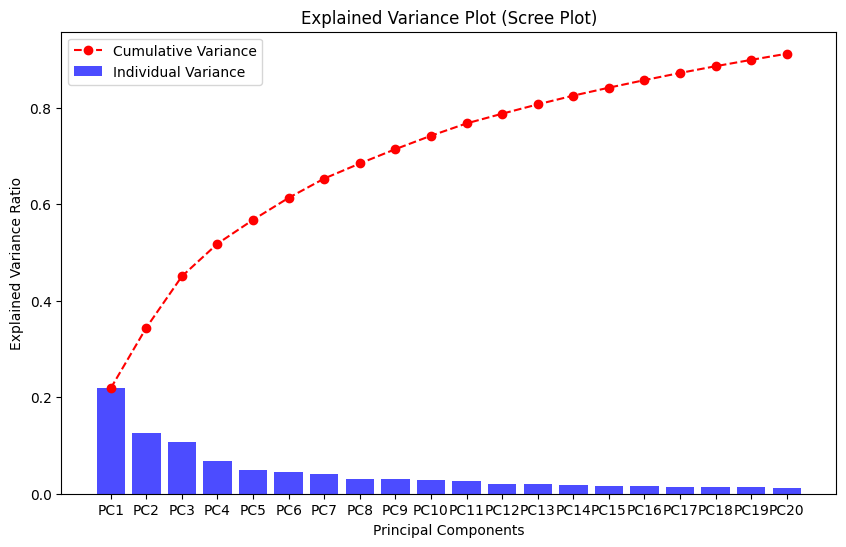

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Explained Variance Plot (Scree Plot)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))

# Bar plot for individual explained variance
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue', label="Individual Variance")

# Line plot for cumulative explained variance
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance),
         color='red', marker='o', linestyle='--', label="Cumulative Variance")

# Title and labels
plt.title('Explained Variance Plot (Scree Plot)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')

# Adjust x-axis ticks to be whole numbers with labels (PC1, PC2, ...)
num_components = len(explained_variance)
plt.xticks(np.arange(1, num_components + 1, 1), labels=[f"PC{i}" for i in range(1, num_components + 1)])

# Add legend
plt.legend()

plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Step 3: Initialize classifiers
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "Support Vector Machine (Two-Class)": SVC(random_state=42),
    "One-Class SVM": OneClassSVM(nu=0.1, kernel="rbf", gamma="scale", shrinking=False, cache_size=500),
    "Isolation Forest": IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
}
# ✅ Step 2: Store metrics
metrics_dict = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}


🔧 Training Random Forest...

📊 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     76621
           1       0.92      0.99      0.95     46458

    accuracy                           0.96    123079
   macro avg       0.96      0.97      0.96    123079
weighted avg       0.97      0.96      0.96    123079

🧩 Random Forest Confusion Matrix:
[[72391  4230]
 [  362 46096]]


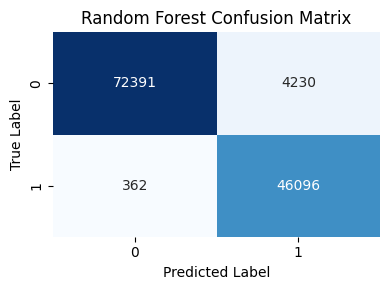


🔧 Training Logistic Regression...

📊 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89     76621
           1       0.76      0.98      0.86     46458

    accuracy                           0.88    123079
   macro avg       0.87      0.90      0.87    123079
weighted avg       0.90      0.88      0.88    123079

🧩 Logistic Regression Confusion Matrix:
[[62386 14235]
 [  940 45518]]


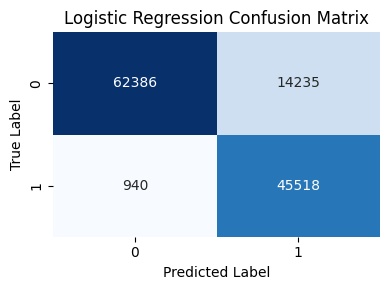


🔧 Training Support Vector Machine (Two-Class)...

📊 Support Vector Machine (Two-Class) Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     76621
           1       0.94      0.99      0.96     46458

    accuracy                           0.97    123079
   macro avg       0.97      0.98      0.97    123079
weighted avg       0.97      0.97      0.97    123079

🧩 Support Vector Machine (Two-Class) Confusion Matrix:
[[73705  2916]
 [  450 46008]]


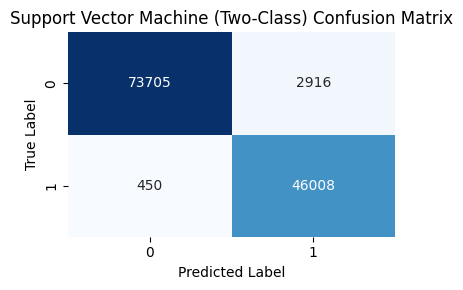


🔧 Training One-Class SVM...

📊 One-Class SVM Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.34      0.43     76621
           1       0.35      0.60      0.44     46458

    accuracy                           0.44    123079
   macro avg       0.47      0.47      0.44    123079
weighted avg       0.50      0.44      0.44    123079

🧩 One-Class SVM Confusion Matrix:
[[26296 50325]
 [18764 27694]]


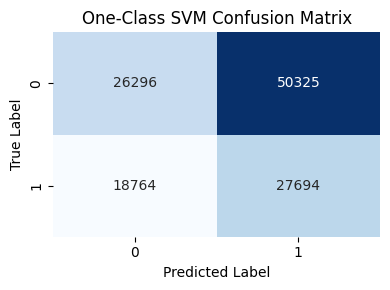


🔧 Training Isolation Forest...

📊 Isolation Forest Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.46      0.54     76621
           1       0.39      0.58      0.47     46458

    accuracy                           0.51    123079
   macro avg       0.52      0.52      0.50    123079
weighted avg       0.55      0.51      0.51    123079

🧩 Isolation Forest Confusion Matrix:
[[35503 41118]
 [19620 26838]]


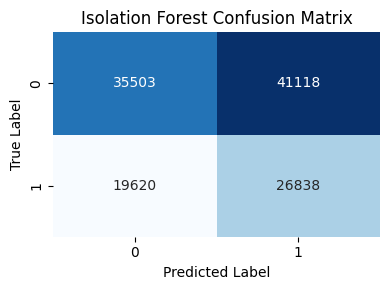

In [ ]:
# ✅ Step 3: Train, evaluate, and plot
for model_name, model in models.items():
    print(f"\n🔧 Training {model_name}...")

    if model_name == "One-Class SVM":
        sample_size = min(10000, len(X_train_pca))
        X_sample = X_train_pca[:sample_size]
        model.fit(X_sample)
        y_pred = model.predict(X_test_pca)
        y_pred = [1 if val == 1 else 0 for val in y_pred]

    elif model_name == "Isolation Forest":
        model.fit(X_train_pca)
        y_pred = model.predict(X_test_pca)
        y_pred = [1 if val == 1 else 0 for val in y_pred]

    else:
        model.fit(X_train_pca, y_train)
        y_pred = model.predict(X_test_pca)

    y_test_trimmed = y_test.iloc[:len(y_pred)]

    # ✅ Metrics
    acc = accuracy_score(y_test_trimmed, y_pred)
    prec = precision_score(y_test_trimmed, y_pred, zero_division=0)
    rec = recall_score(y_test_trimmed, y_pred, zero_division=0)
    f1 = f1_score(y_test_trimmed, y_pred, zero_division=0)

    metrics_dict["Model"].append(model_name)
    metrics_dict["Accuracy"].append(acc)
    metrics_dict["Precision"].append(prec)
    metrics_dict["Recall"].append(rec)
    metrics_dict["F1-Score"].append(f1)

    # ✅ Classification Report
    print(f"\n📊 {model_name} Classification Report:")
    print(classification_report(y_test_trimmed, y_pred, zero_division=0))

    # ✅ Confusion Matrix Print
    cm = confusion_matrix(y_test_trimmed, y_pred)
    print(f"🧩 {model_name} Confusion Matrix:")
    print(cm)

    # ✅ Confusion Matrix Plot
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()


✅ Final Model Comparison Table:


,Model,Accuracy,Precision,Recall,F1-Score
0,Support Vector Machine (Two-Class),0.972652,0.940397,0.990314,0.964710
1,Random Forest,0.962691,0.915948,0.992208,0.952554
2,Logistic Regression,0.876705,0.761769,0.979767,0.857124
3,Isolation Forest,0.506512,0.394932,0.577683,0.469138
4,One-Class SVM,0.438661,0.354965,0.596108,0.444966


<Figure size 1200x600 with 0 Axes>

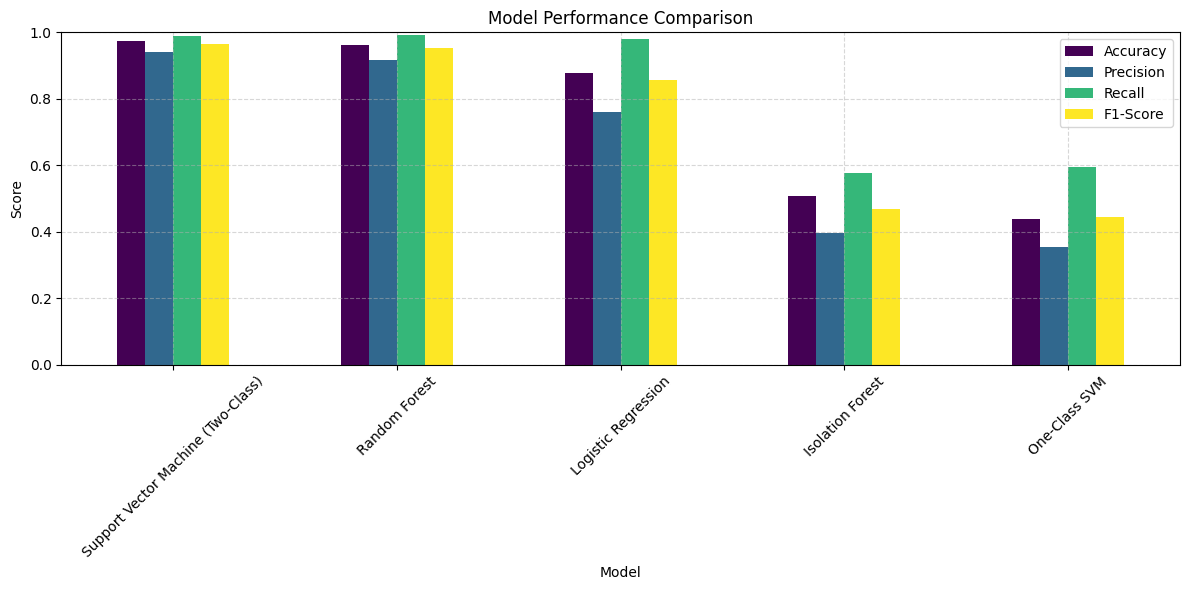

In [ ]:
# ✅ Step 4: Compare Models
metrics_df = pd.DataFrame(metrics_dict)
metrics_df = metrics_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)
print("\n✅ Final Model Comparison Table:")
display(metrics_df)

# ✅ Step 5: Plot Metrics
plt.figure(figsize=(12, 6))
metrics_df.set_index("Model").plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# ✅ FINAL CHECK BEFORE SHAP
print("\n✅ Final Shape Checks Before SHAP:")
print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")
print(f"y_train shape: {y_train.shape} (should be 1D)")
print(f"y_test shape: {y_test.shape} (should be 1D)")


✅ Final Shape Checks Before SHAP:
X_train_pca shape: (300493, 20)
X_test_pca shape: (123079, 20)
y_train shape: (300493,) (should be 1D)
y_test shape: (123079,) (should be 1D)


In [ ]:
import pandas as pd

# ✅ Extract PCA loadings (Feature contributions to PCA components)
pca_loadings = pca.components_  # Shape: (num_pca_components, num_original_features)

# ✅ Convert to DataFrame (Ensures original features are mapped)
pca_loadings_df = pd.DataFrame(
    pca_loadings,
    columns=original_feature_names,  # Now correctly defined!
    index=[f"PCA_{i+1}" for i in range(len(pca.components_))]
)



🔍 Top 10 Features Contributing to RST Flag Count:
PCA_8     0.334609
PCA_9     0.320520
PCA_7     0.212941
PCA_6     0.207856
PCA_11    0.204350
PCA_10    0.193605
PCA_5     0.135790
PCA_13    0.096692
PCA_14    0.091986
PCA_2     0.078287
Name: RST Flag Count, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


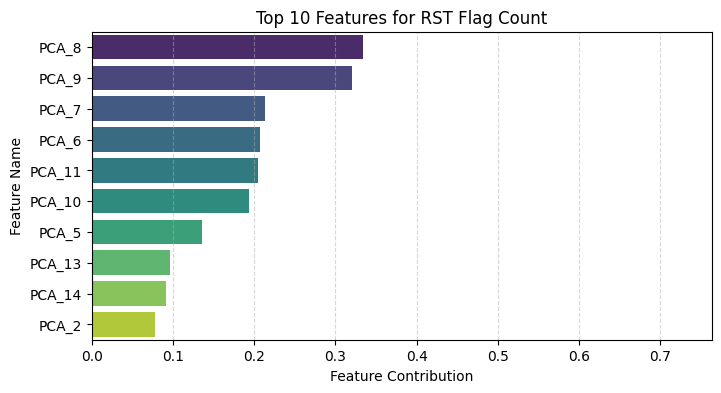


🔍 Top 10 Features Contributing to Fwd PSH Flags:
PCA_8     0.334609
PCA_9     0.320520
PCA_7     0.212941
PCA_6     0.207856
PCA_11    0.204350
PCA_10    0.193605
PCA_5     0.135790
PCA_13    0.096692
PCA_14    0.091986
PCA_2     0.078287
Name: Fwd PSH Flags, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


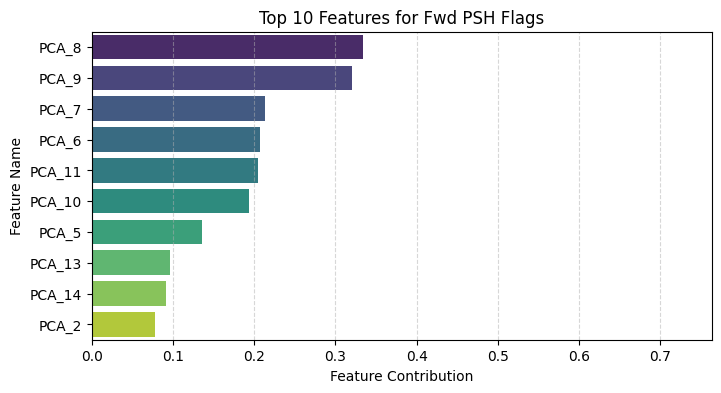

/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")



🔍 Top 10 Features Contributing to Bwd IAT Total:
PCA_1     0.201030
PCA_8     0.168207
PCA_7     0.138502
PCA_9     0.127861
PCA_5     0.114413
PCA_11    0.097518
PCA_6     0.089395
PCA_13    0.085309
PCA_10    0.078763
PCA_2     0.066011
Name: Bwd IAT Total, dtype: float64


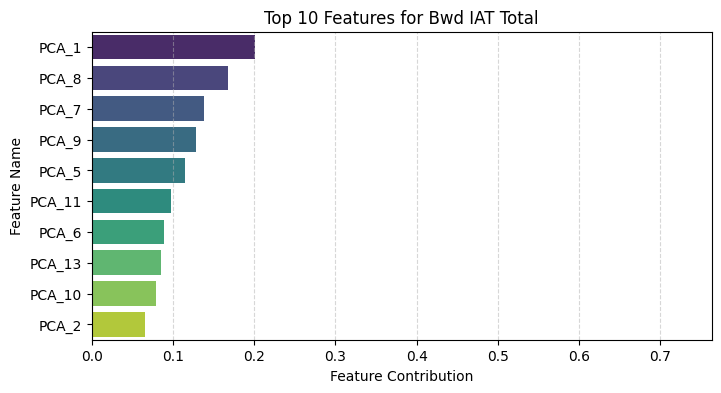


🔍 Top 10 Features Contributing to Fwd IAT Total:
PCA_1     0.223666
PCA_3     0.114901
PCA_14    0.082058
PCA_19    0.079102
PCA_13    0.072608
PCA_15    0.057025
PCA_2     0.046092
PCA_10    0.042673
PCA_4     0.036144
PCA_8     0.034312
Name: Fwd IAT Total, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


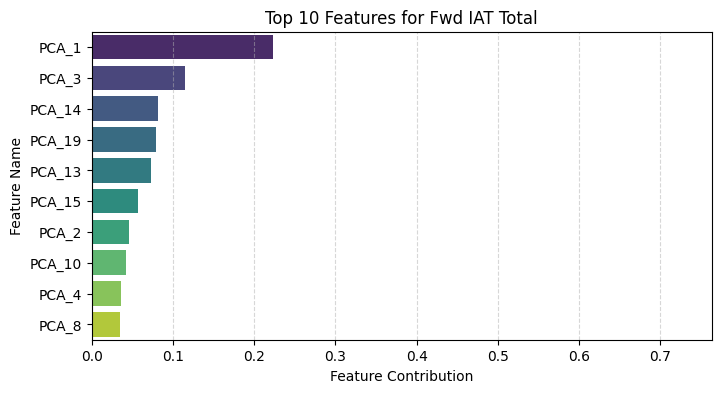


🔍 Top 10 Features Contributing to Idle Max:
PCA_1     0.234712
PCA_3     0.125202
PCA_4     0.055315
PCA_14    0.048892
PCA_10    0.046943
PCA_6     0.046018
PCA_11    0.043873
PCA_9     0.032527
PCA_13    0.032488
PCA_16    0.030931
Name: Idle Max, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


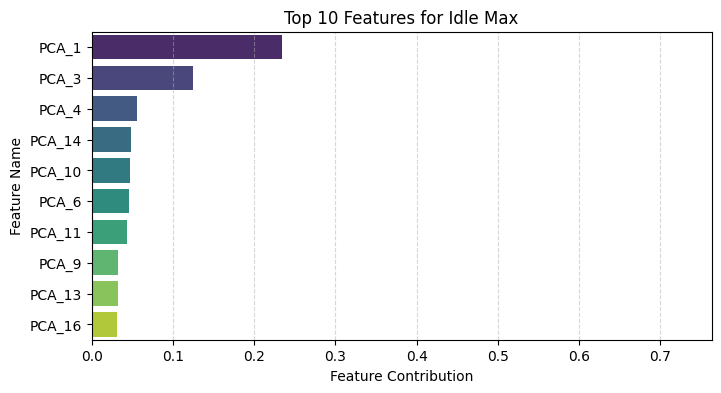


🔍 Top 10 Features Contributing to Protocol:
PCA_8     0.164957
PCA_10    0.164044
PCA_1     0.162255
PCA_2     0.149549
PCA_7     0.145319
PCA_11    0.138894
PCA_5     0.131252
PCA_6     0.104892
PCA_9     0.103992
PCA_20    0.083750
Name: Protocol, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


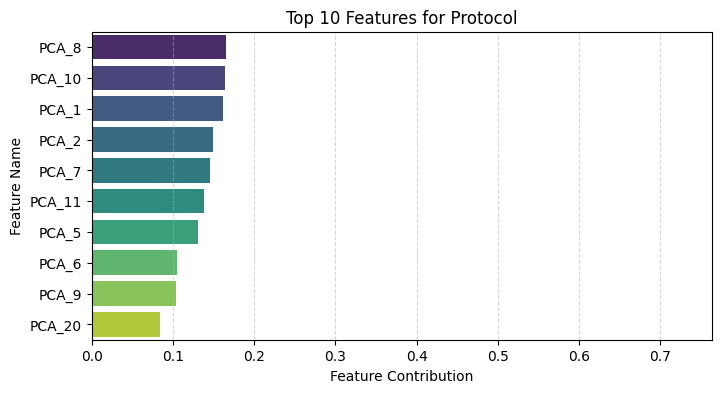


🔍 Top 10 Features Contributing to Fwd IAT Std:
PCA_1     0.203806
PCA_3     0.186885
PCA_5     0.138474
PCA_8     0.094379
PCA_7     0.092872
PCA_13    0.076038
PCA_10    0.051957
PCA_9     0.047444
PCA_19    0.040800
PCA_12    0.037163
Name: Fwd IAT Std, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


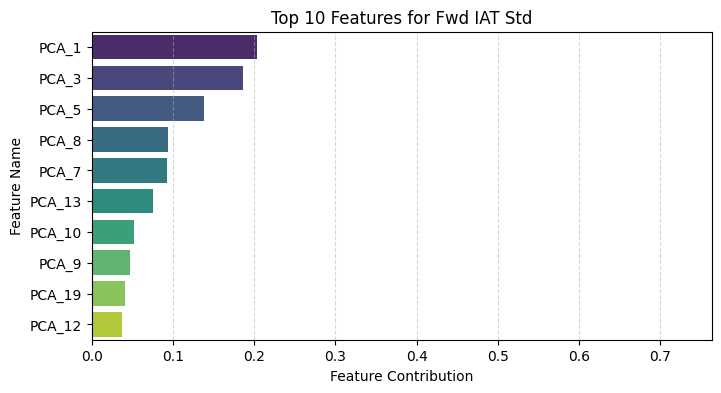


🔍 Top 10 Features Contributing to Init_Win_bytes_backward:
PCA_14    0.360093
PCA_11    0.250783
PCA_20    0.235499
PCA_10    0.224886
PCA_19    0.217975
PCA_16    0.184252
PCA_8     0.178790
PCA_5     0.166175
PCA_17    0.146226
PCA_15    0.082367
Name: Init_Win_bytes_backward, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


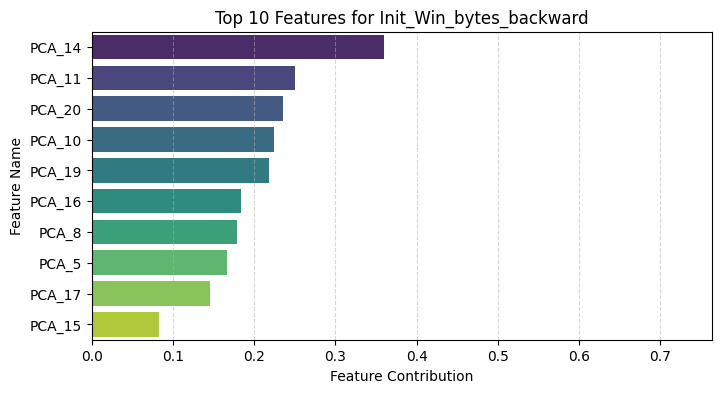


🔍 Top 10 Features Contributing to Flow Bytes/s:
PCA_5     0.269636
PCA_8     0.221158
PCA_6     0.174677
PCA_7     0.156018
PCA_2     0.150466
PCA_10    0.144832
PCA_4     0.117547
PCA_11    0.116541
PCA_9     0.092644
PCA_15    0.069229
Name: Flow Bytes/s, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


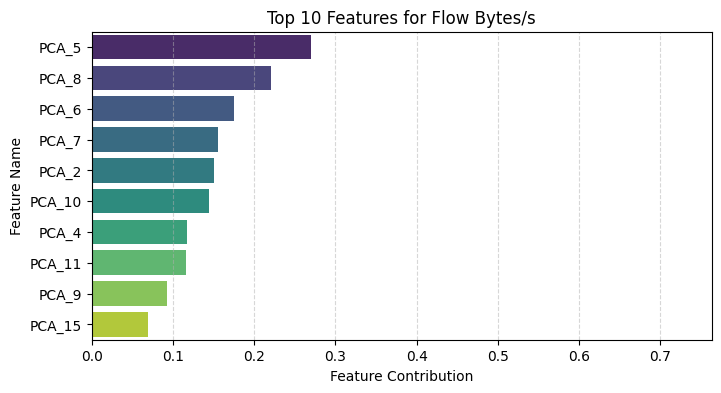


🔍 Top 10 Features Contributing to Active Max:
PCA_6     0.396038
PCA_5     0.301424
PCA_14    0.154333
PCA_11    0.134314
PCA_10    0.110652
PCA_9     0.082099
PCA_1     0.082038
PCA_8     0.079154
PCA_19    0.062834
PCA_15    0.038710
Name: Active Max, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


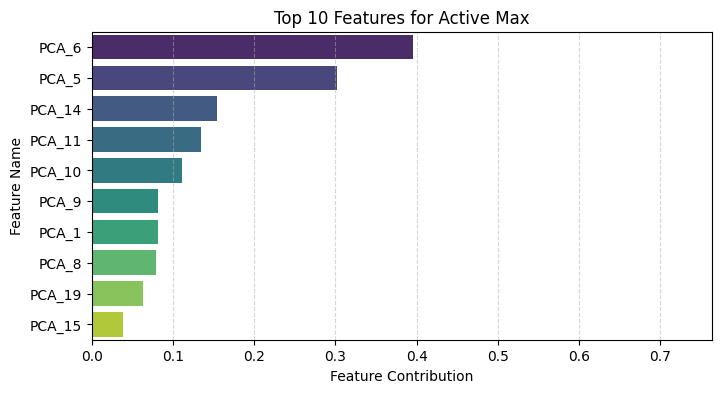


🔍 Top 10 Features Contributing to Flow IAT Max:
PCA_1     0.233389
PCA_3     0.141566
PCA_13    0.063102
PCA_2     0.047431
PCA_5     0.043767
PCA_12    0.029942
PCA_7     0.029112
PCA_6     0.020131
PCA_14    0.019988
PCA_9     0.017844
Name: Flow IAT Max, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


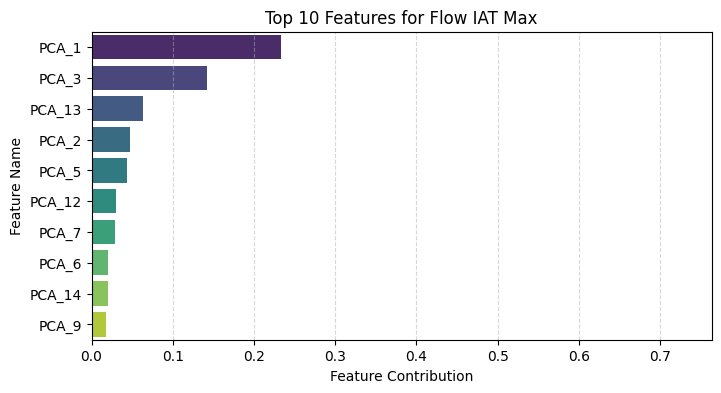


🔍 Top 10 Features Contributing to SYN Flag Count:
PCA_15    0.612129
PCA_18    0.610581
PCA_16    0.406259
PCA_17    0.207005
PCA_14    0.176028
PCA_20    0.057230
PCA_13    0.048469
PCA_12    0.030589
PCA_7     0.017327
PCA_10    0.016892
Name: SYN Flag Count, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


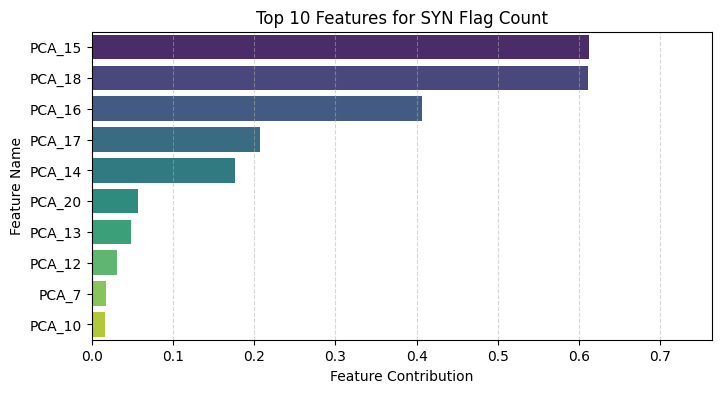


🔍 Top 10 Features Contributing to Subflow Fwd Bytes:
PCA_4     0.389572
PCA_19    0.259910
PCA_20    0.181623
PCA_8     0.115794
PCA_16    0.101659
PCA_13    0.097316
PCA_15    0.077588
PCA_2     0.074277
PCA_17    0.069656
PCA_7     0.065208
Name: Subflow Fwd Bytes, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


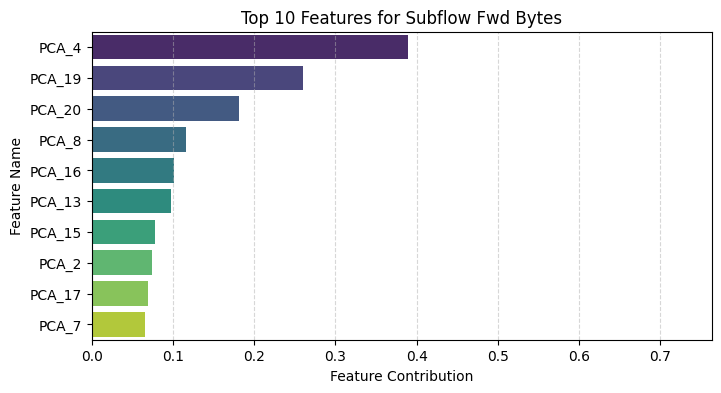


🔍 Top 10 Features Contributing to Avg Bwd Segment Size:
PCA_3     0.231175
PCA_13    0.230746
PCA_7     0.167348
PCA_1     0.131115
PCA_12    0.130336
PCA_19    0.110839
PCA_9     0.106941
PCA_11    0.096014
PCA_8     0.091035
PCA_2     0.088178
Name: Avg Bwd Segment Size, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


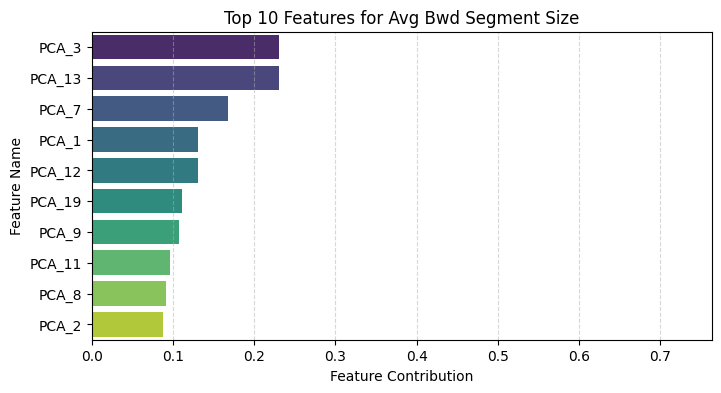


🔍 Top 10 Features Contributing to Bwd Packet Length Max:
PCA_3     0.229263
PCA_1     0.153220
PCA_2     0.139920
PCA_20    0.075468
PCA_4     0.059389
PCA_7     0.057749
PCA_15    0.056133
PCA_16    0.051406
PCA_9     0.050194
PCA_17    0.047708
Name: Bwd Packet Length Max, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


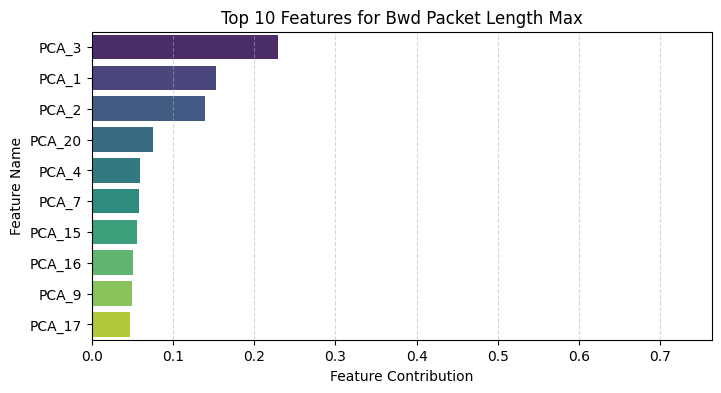


🔍 Top 10 Features Contributing to Avg Fwd Segment Size:
PCA_2     0.276576
PCA_3     0.124714
PCA_1     0.120402
PCA_11    0.085420
PCA_10    0.073359
PCA_4     0.048952
PCA_8     0.038346
PCA_16    0.038109
PCA_5     0.038102
PCA_13    0.037293
Name: Avg Fwd Segment Size, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


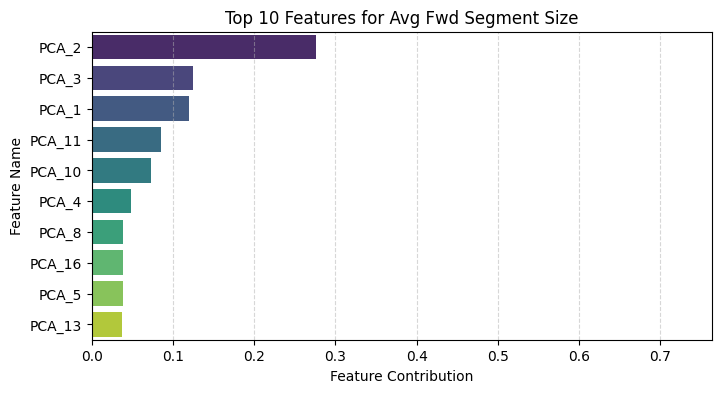


🔍 Top 10 Features Contributing to Fwd Packets/s:
PCA_5     0.295739
PCA_8     0.234519
PCA_6     0.219643
PCA_11    0.216356
PCA_10    0.197168
PCA_7     0.194449
PCA_13    0.107315
PCA_4     0.094036
PCA_2     0.094009
PCA_9     0.092416
Name: Fwd Packets/s, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


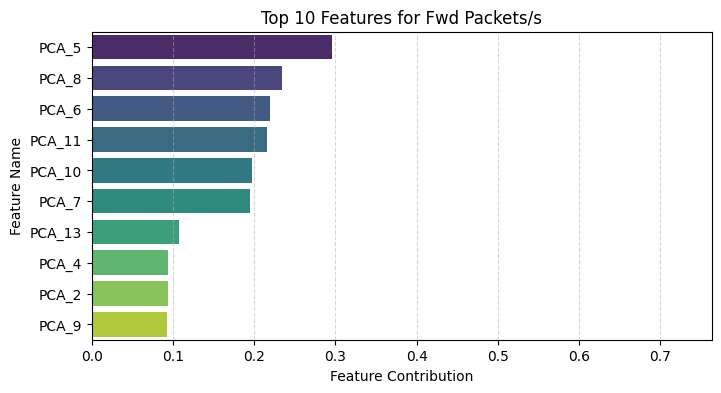


🔍 Top 10 Features Contributing to Fwd Packet Length Mean:
PCA_2     0.276576
PCA_3     0.124714
PCA_1     0.120402
PCA_11    0.085420
PCA_10    0.073359
PCA_4     0.048952
PCA_8     0.038346
PCA_16    0.038109
PCA_5     0.038102
PCA_13    0.037293
Name: Fwd Packet Length Mean, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


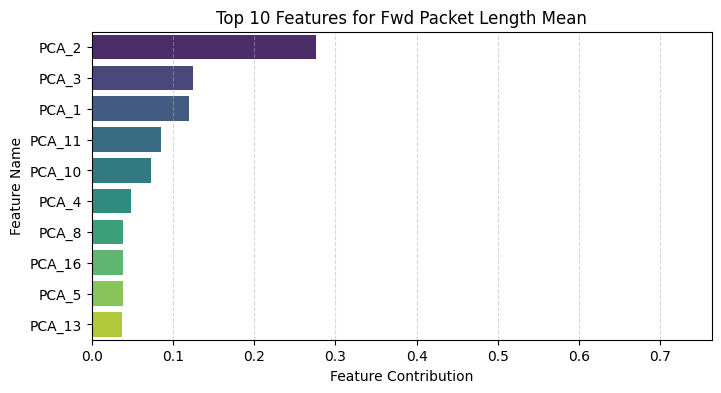


🔍 Top 10 Features Contributing to Fwd Packet Length Std:
PCA_19    0.357200
PCA_13    0.323732
PCA_7     0.234137
PCA_9     0.204716
PCA_12    0.178830
PCA_5     0.140982
PCA_14    0.115197
PCA_15    0.108088
PCA_16    0.102329
PCA_1     0.101835
Name: Fwd Packet Length Std, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


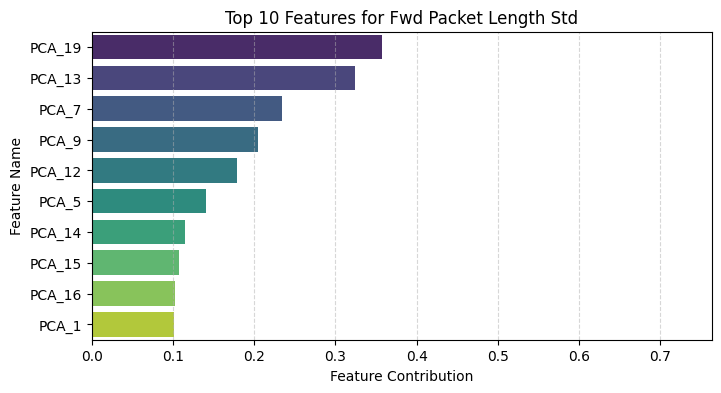


🔍 Top 10 Features Contributing to Flow Duration:
PCA_1     0.225875
PCA_3     0.114346
PCA_19    0.074736
PCA_13    0.068460
PCA_14    0.061586
PCA_15    0.052594
PCA_2     0.043975
PCA_9     0.041772
PCA_10    0.037362
PCA_4     0.036243
Name: Flow Duration, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


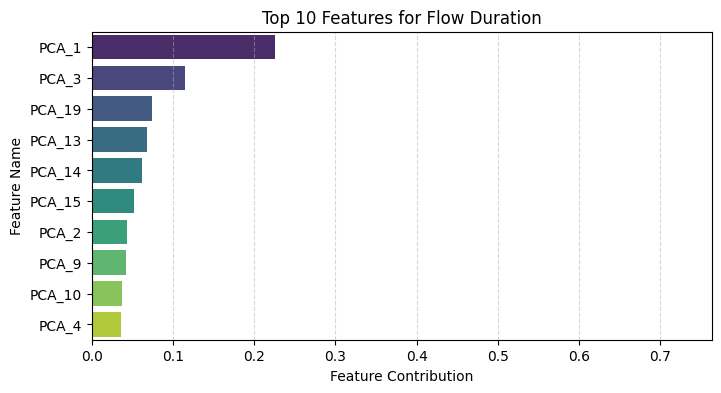


🔍 Top 10 Features Contributing to Idle Std:
PCA_20    0.248016
PCA_14    0.233632
PCA_15    0.186915
PCA_7     0.111984
PCA_8     0.110744
PCA_11    0.108175
PCA_1     0.097902
PCA_17    0.088022
PCA_3     0.082563
PCA_19    0.071579
Name: Idle Std, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


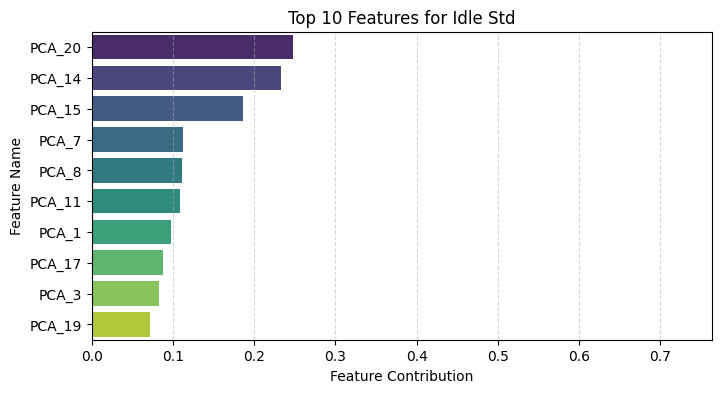


🔍 Top 10 Features Contributing to Total Fwd Packets:
PCA_4     0.424927
PCA_19    0.175741
PCA_20    0.102297
PCA_2     0.083746
PCA_7     0.068755
PCA_3     0.066729
PCA_8     0.060720
PCA_16    0.053659
PCA_15    0.040472
PCA_17    0.035816
Name: Total Fwd Packets, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


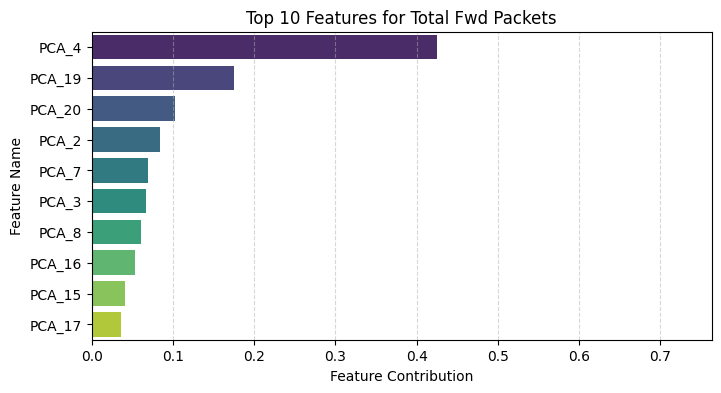


🔍 Top 10 Features Contributing to act_data_pkt_fwd:
PCA_4     0.429265
PCA_19    0.167553
PCA_20    0.106608
PCA_8     0.073161
PCA_2     0.069842
PCA_16    0.061766
PCA_15    0.051239
PCA_13    0.048005
PCA_1     0.045429
PCA_3     0.044459
Name: act_data_pkt_fwd, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


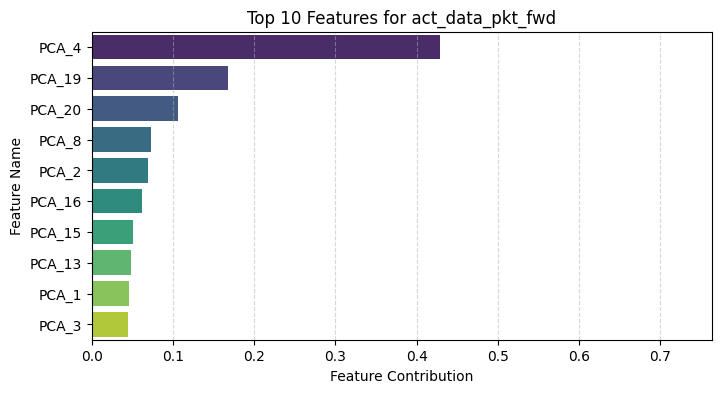


🔍 Top 10 Features Contributing to Fwd IAT Mean:
PCA_3     0.193996
PCA_5     0.177979
PCA_8     0.173122
PCA_1     0.165162
PCA_7     0.158151
PCA_9     0.118648
PCA_6     0.083087
PCA_19    0.047690
PCA_13    0.047682
PCA_4     0.045085
Name: Fwd IAT Mean, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


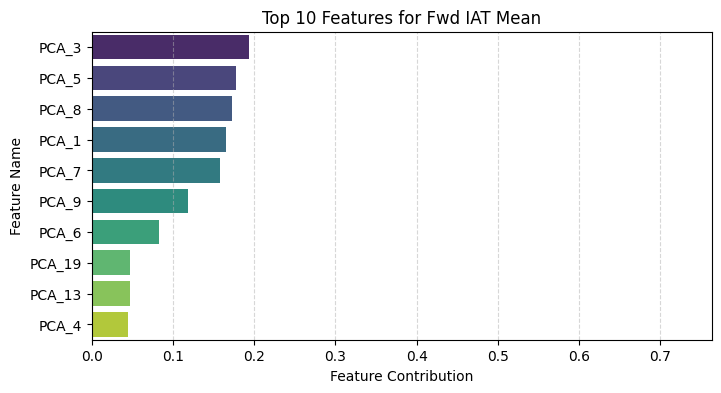


🔍 Top 10 Features Contributing to Packet Length Min:
PCA_2     0.250850
PCA_13    0.152365
PCA_3     0.142337
PCA_19    0.138694
PCA_1     0.120060
PCA_11    0.105030
PCA_12    0.077040
PCA_4     0.062832
PCA_7     0.055981
PCA_10    0.055757
Name: Packet Length Min, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


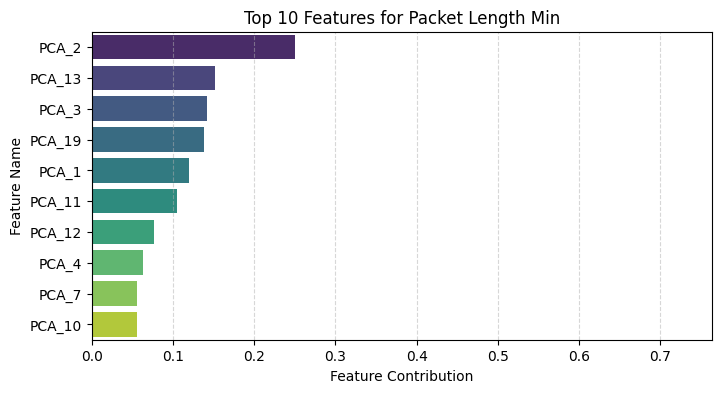


🔍 Top 10 Features Contributing to Fwd IAT Min:
PCA_10    0.466498
PCA_9     0.368751
PCA_6     0.230218
PCA_11    0.221607
PCA_7     0.127967
PCA_5     0.092320
PCA_14    0.090749
PCA_8     0.055613
PCA_13    0.030220
PCA_12    0.024723
Name: Fwd IAT Min, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


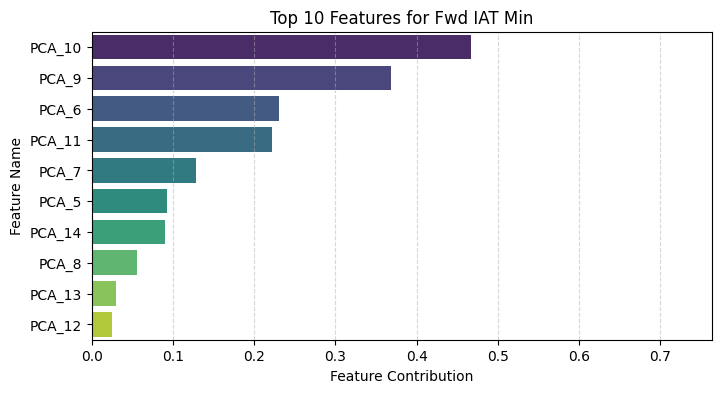


🔍 Top 10 Features Contributing to Subflow Fwd Packets:
PCA_4     0.424927
PCA_19    0.175741
PCA_20    0.102297
PCA_2     0.083746
PCA_7     0.068755
PCA_3     0.066729
PCA_8     0.060720
PCA_16    0.053659
PCA_15    0.040472
PCA_17    0.035816
Name: Subflow Fwd Packets, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


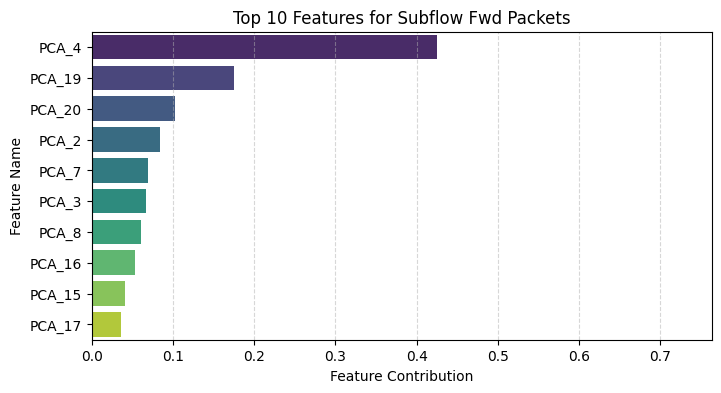


🔍 Top 10 Features Contributing to Packet Length Std:
PCA_3     0.226621
PCA_7     0.186408
PCA_9     0.164918
PCA_1     0.148210
PCA_2     0.118098
PCA_19    0.099996
PCA_14    0.065902
PCA_8     0.058124
PCA_4     0.050980
PCA_11    0.047749
Name: Packet Length Std, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


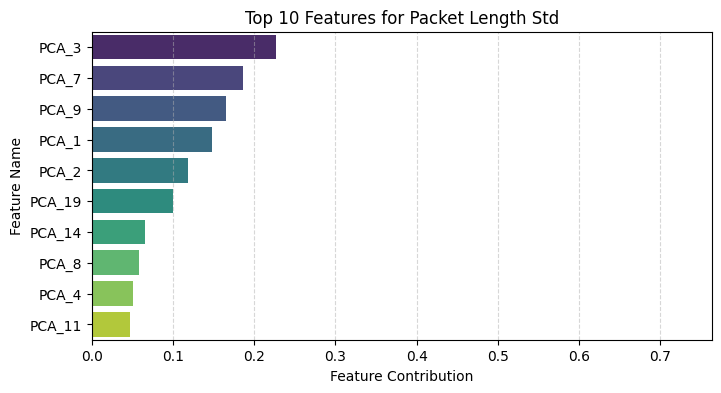


🔍 Top 10 Features Contributing to Subflow Bwd Bytes:
PCA_7     0.292485
PCA_3     0.233288
PCA_5     0.165750
PCA_9     0.146227
PCA_2     0.129908
PCA_8     0.100843
PCA_13    0.085830
PCA_1     0.063646
PCA_6     0.061098
PCA_14    0.057474
Name: Subflow Bwd Bytes, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


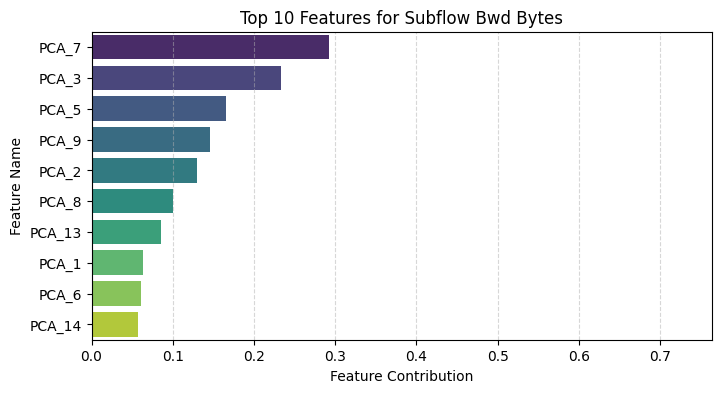


🔍 Top 10 Features Contributing to Bwd IAT Mean:
PCA_14    0.253721
PCA_8     0.173938
PCA_1     0.156704
PCA_9     0.153357
PCA_11    0.138151
PCA_19    0.108648
PCA_6     0.101417
PCA_15    0.086653
PCA_5     0.084358
PCA_3     0.077140
Name: Bwd IAT Mean, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


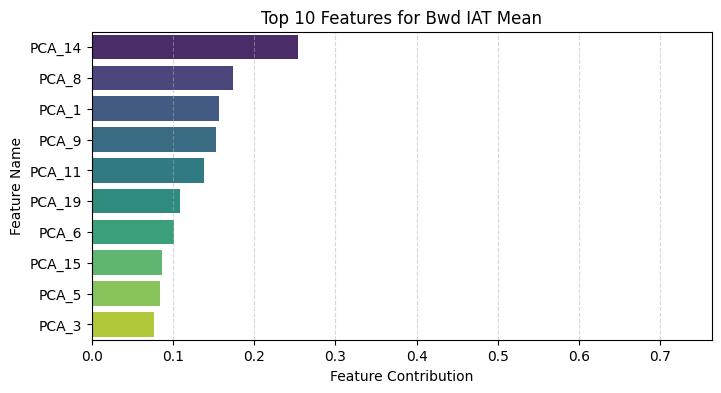


🔍 Top 10 Features Contributing to Fwd IAT Max:
PCA_1     0.231096
PCA_3     0.141663
PCA_13    0.057247
PCA_5     0.053820
PCA_14    0.051656
PCA_2     0.050461
PCA_7     0.029762
PCA_6     0.025836
PCA_12    0.025200
PCA_16    0.014870
Name: Fwd IAT Max, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


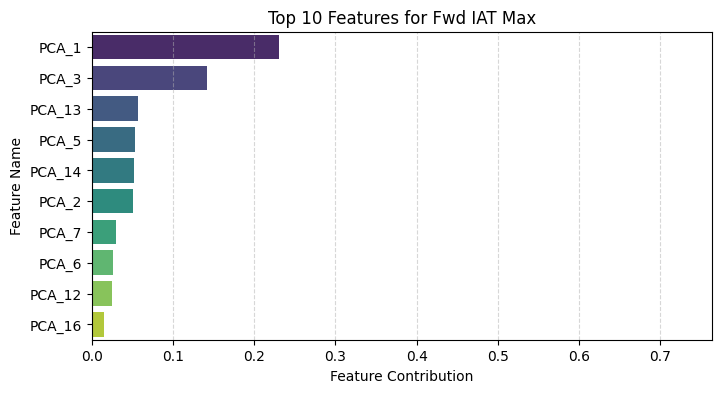


🔍 Top 10 Features Contributing to Flow IAT Mean:
PCA_8     0.200900
PCA_5     0.190823
PCA_3     0.190562
PCA_7     0.179145
PCA_1     0.138492
PCA_9     0.123519
PCA_6     0.118852
PCA_13    0.061989
PCA_10    0.061152
PCA_19    0.061110
Name: Flow IAT Mean, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


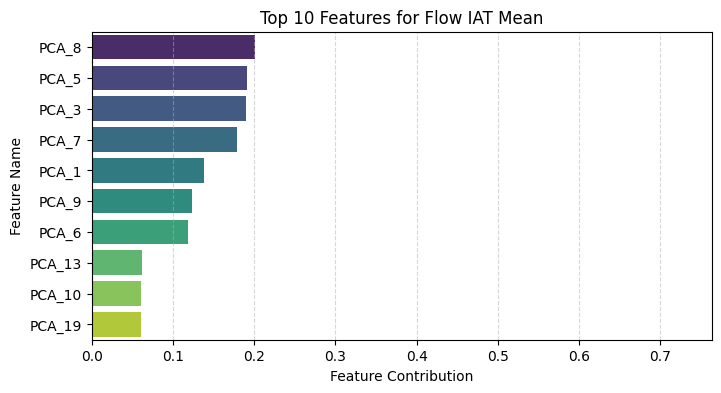


🔍 Top 10 Features Contributing to Subflow Bwd Packets:
PCA_7     0.243175
PCA_3     0.219546
PCA_9     0.152736
PCA_2     0.130647
PCA_13    0.111430
PCA_5     0.106742
PCA_1     0.104211
PCA_8     0.103070
PCA_16    0.076744
PCA_20    0.075995
Name: Subflow Bwd Packets, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


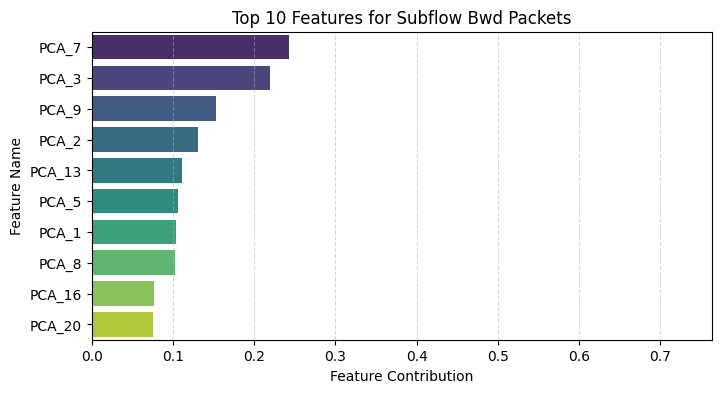


🔍 Top 10 Features Contributing to Active Std:
PCA_14    0.448766
PCA_19    0.437933
PCA_15    0.269438
PCA_13    0.162550
PCA_5     0.150628
PCA_6     0.142206
PCA_8     0.112269
PCA_17    0.111999
PCA_12    0.095978
PCA_1     0.090091
Name: Active Std, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


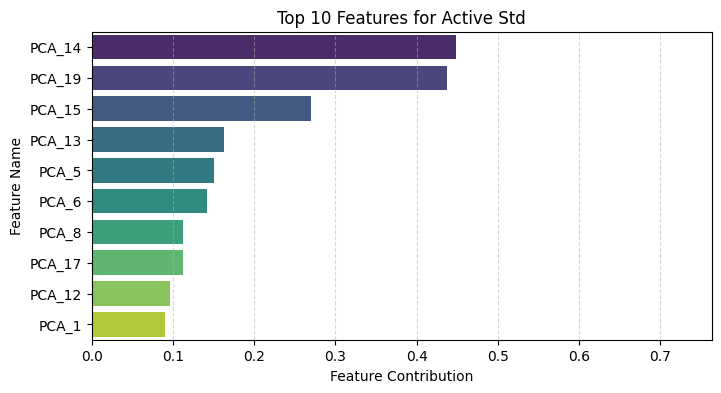


🔍 Top 10 Features Contributing to Packet Length Max:
PCA_2     0.264460
PCA_3     0.164976
PCA_1     0.092891
PCA_9     0.074824
PCA_19    0.065912
PCA_4     0.050414
PCA_11    0.046991
PCA_7     0.045731
PCA_10    0.045620
PCA_13    0.031489
Name: Packet Length Max, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


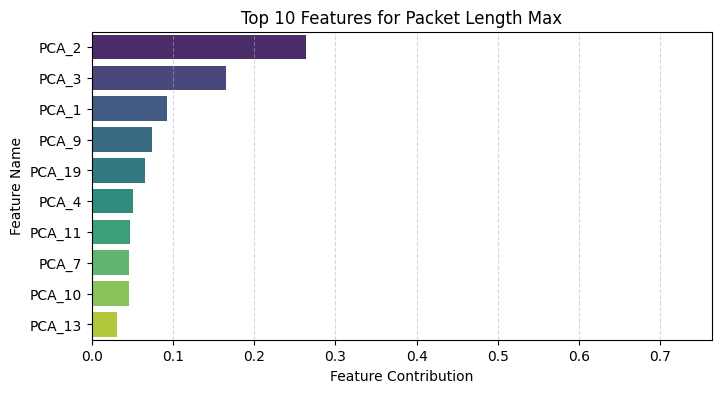


🔍 Top 10 Features Contributing to URG Flag Count:
PCA_11    0.231989
PCA_7     0.224036
PCA_6     0.200193
PCA_14    0.195043
PCA_5     0.180954
PCA_2     0.175337
PCA_13    0.123735
PCA_10    0.114675
PCA_18    0.091461
PCA_8     0.088645
Name: URG Flag Count, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


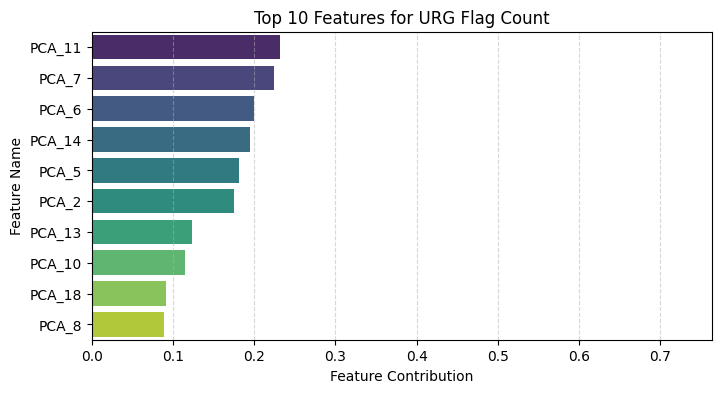


🔍 Top 10 Features Contributing to Fwd Packet Length Max:
PCA_2     0.292268
PCA_19    0.212040
PCA_16    0.130433
PCA_15    0.119034
PCA_10    0.111824
PCA_9     0.109998
PCA_5     0.106066
PCA_20    0.105819
PCA_7     0.103513
PCA_11    0.096440
Name: Fwd Packet Length Max, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


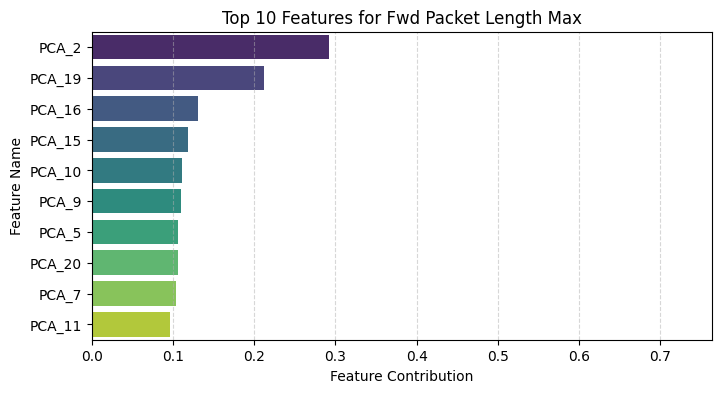


🔍 Top 10 Features Contributing to Bwd Packets Length Total:
PCA_7     0.292485
PCA_3     0.233288
PCA_5     0.165750
PCA_9     0.146227
PCA_2     0.129908
PCA_8     0.100843
PCA_13    0.085830
PCA_1     0.063646
PCA_6     0.061098
PCA_14    0.057474
Name: Bwd Packets Length Total, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


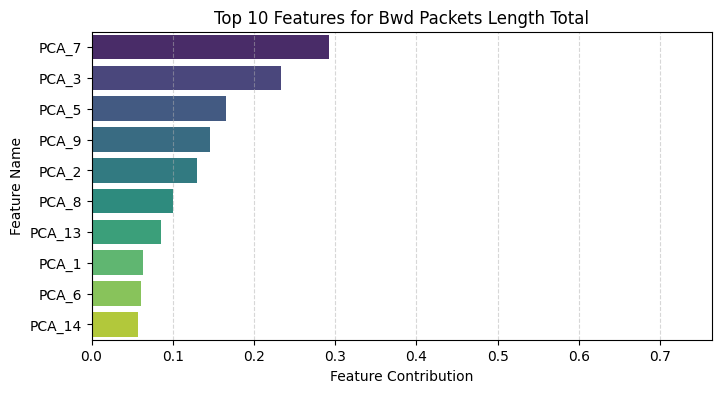


🔍 Top 10 Features Contributing to Bwd IAT Std:
PCA_8     0.200813
PCA_1     0.192174
PCA_14    0.177549
PCA_9     0.155477
PCA_6     0.119153
PCA_11    0.118802
PCA_7     0.099612
PCA_5     0.096575
PCA_10    0.091725
PCA_3     0.083686
Name: Bwd IAT Std, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


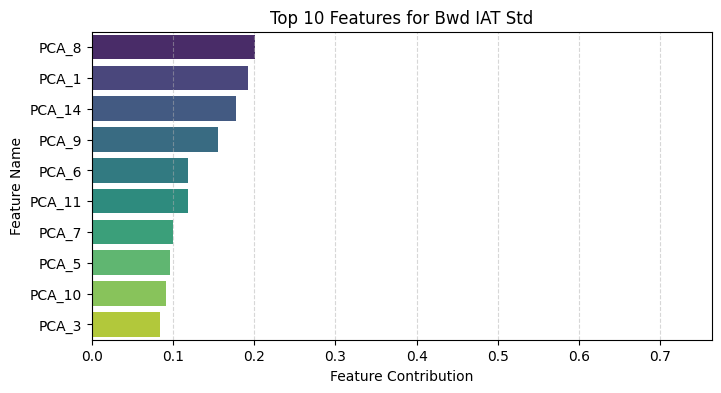


🔍 Top 10 Features Contributing to Idle Min:
PCA_1     0.228211
PCA_3     0.112931
PCA_20    0.086106
PCA_6     0.059104
PCA_15    0.055422
PCA_4     0.054749
PCA_9     0.054038
PCA_13    0.053558
PCA_10    0.053101
PCA_16    0.050510
Name: Idle Min, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


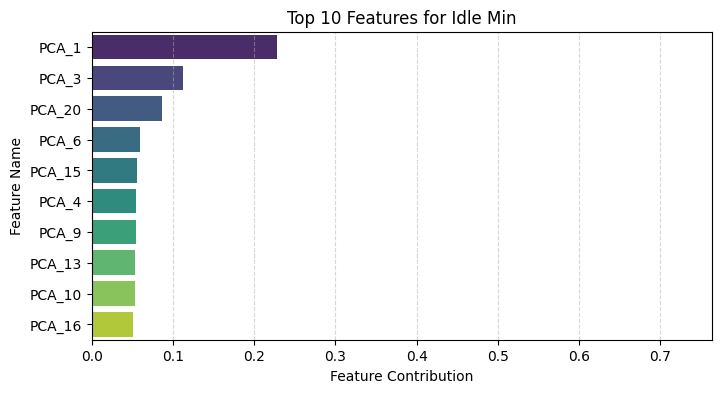


🔍 Top 10 Features Contributing to Flow IAT Std:
PCA_3     0.193357
PCA_1     0.189432
PCA_5     0.154407
PCA_8     0.124944
PCA_7     0.116142
PCA_13    0.085164
PCA_10    0.072972
PCA_19    0.061734
PCA_9     0.047806
PCA_12    0.043531
Name: Flow IAT Std, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


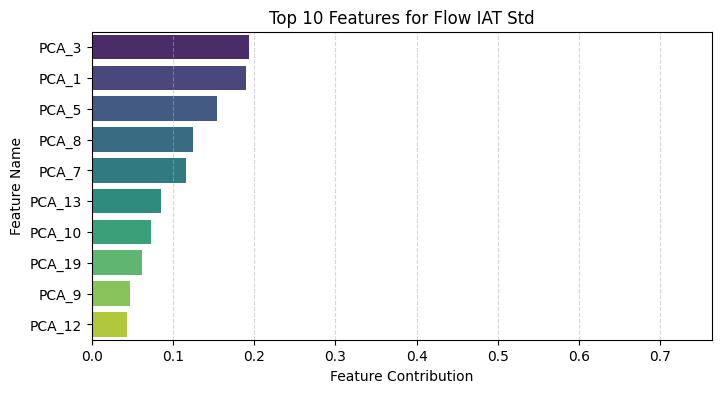


🔍 Top 10 Features Contributing to Avg Packet Size:
PCA_2     0.289907
PCA_13    0.129806
PCA_4     0.127457
PCA_1     0.089002
PCA_3     0.083994
PCA_11    0.067519
PCA_5     0.057397
PCA_12    0.056777
PCA_10    0.045241
PCA_17    0.036380
Name: Avg Packet Size, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


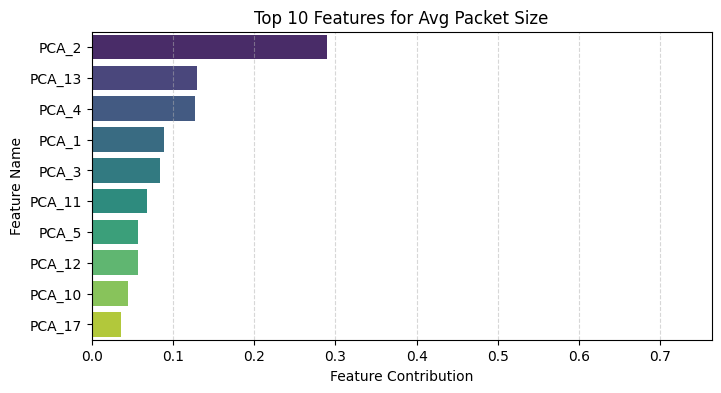


🔍 Top 10 Features Contributing to Flow IAT Min:
PCA_10    0.464553
PCA_9     0.367322
PCA_6     0.229953
PCA_11    0.227895
PCA_7     0.129975
PCA_5     0.094677
PCA_14    0.086406
PCA_8     0.054740
PCA_13    0.029490
PCA_12    0.024393
Name: Flow IAT Min, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


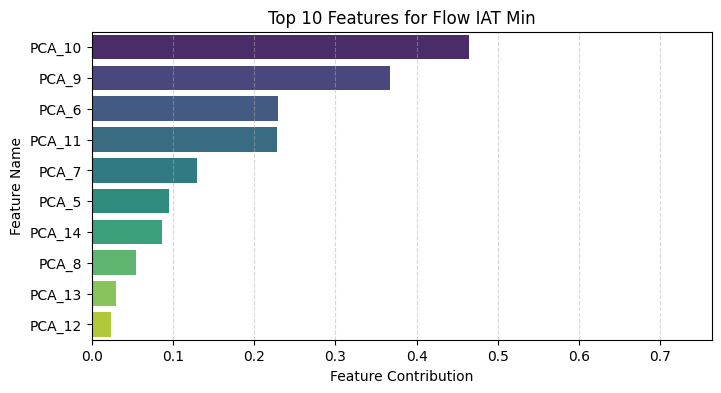


🔍 Top 10 Features Contributing to Total Backward Packets:
PCA_7     0.243175
PCA_3     0.219546
PCA_9     0.152736
PCA_2     0.130647
PCA_13    0.111430
PCA_5     0.106742
PCA_1     0.104211
PCA_8     0.103070
PCA_16    0.076744
PCA_20    0.075995
Name: Total Backward Packets, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


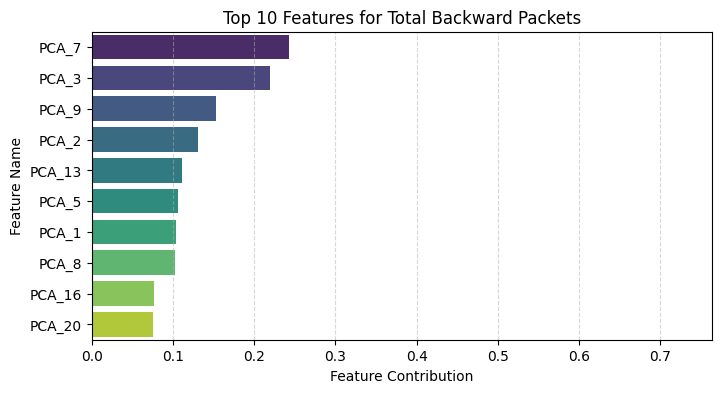


🔍 Top 10 Features Contributing to Bwd Packets/s:
PCA_18    0.763240
PCA_15    0.475571
PCA_14    0.277711
PCA_16    0.270518
PCA_19    0.103901
PCA_11    0.092341
PCA_17    0.056323
PCA_8     0.051769
PCA_7     0.047213
PCA_9     0.043213
Name: Bwd Packets/s, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


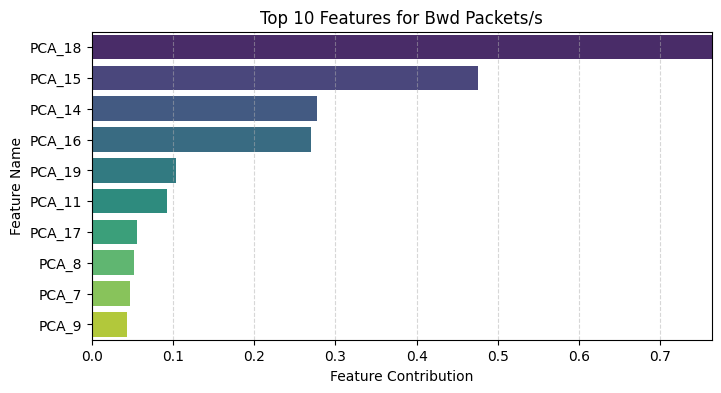


🔍 Top 10 Features Contributing to Flow Packets/s:
PCA_5     0.297308
PCA_8     0.236956
PCA_6     0.221132
PCA_11    0.209590
PCA_10    0.197272
PCA_7     0.196745
PCA_13    0.105173
PCA_9     0.094844
PCA_4     0.094421
PCA_2     0.091969
Name: Flow Packets/s, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


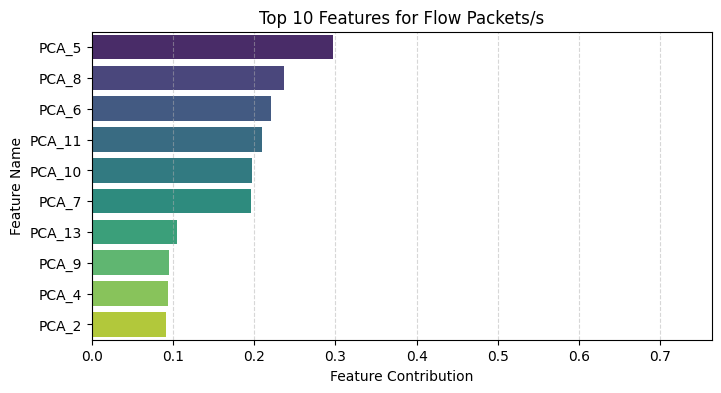

/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")



🔍 Top 10 Features Contributing to Active Mean:
PCA_6     0.415845
PCA_5     0.297795
PCA_11    0.139014
PCA_10    0.131317
PCA_19    0.113638
PCA_9     0.093051
PCA_15    0.082452
PCA_13    0.081922
PCA_1     0.065088
PCA_17    0.053973
Name: Active Mean, dtype: float64


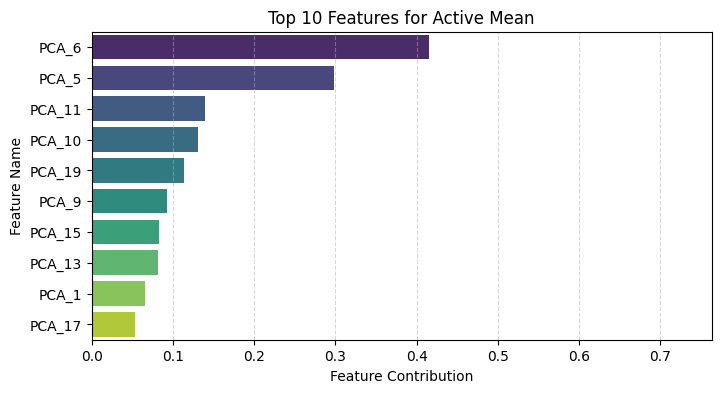


🔍 Top 10 Features Contributing to Idle Mean:
PCA_1     0.233624
PCA_3     0.120006
PCA_4     0.055435
PCA_6     0.053117
PCA_20    0.050621
PCA_10    0.050054
PCA_9     0.043710
PCA_13    0.043213
PCA_16    0.041249
PCA_17    0.033003
Name: Idle Mean, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


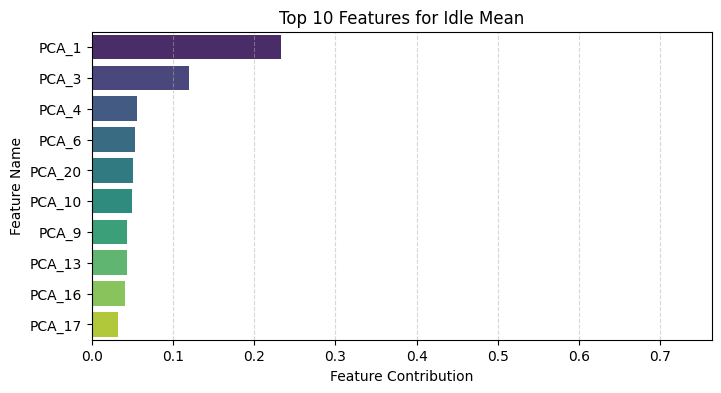


🔍 Top 10 Features Contributing to ACK Flag Count:
PCA_8     0.322833
PCA_1     0.180687
PCA_14    0.177375
PCA_13    0.131996
PCA_10    0.117821
PCA_19    0.086538
PCA_9     0.072755
PCA_16    0.063906
PCA_12    0.062888
PCA_6     0.059456
Name: ACK Flag Count, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


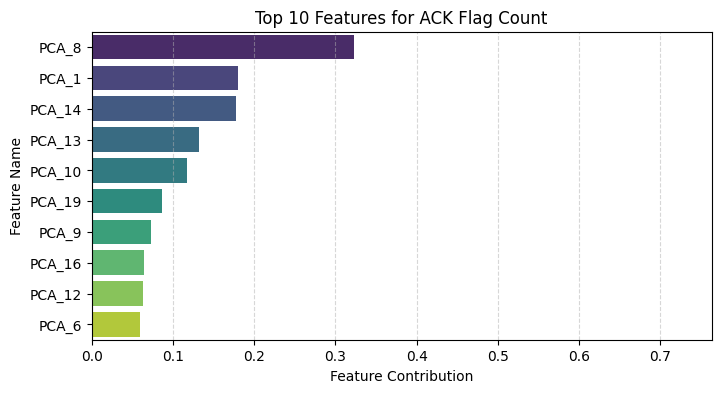


🔍 Top 10 Features Contributing to Fwd Packet Length Min:
PCA_2     0.251045
PCA_13    0.155538
PCA_3     0.141566
PCA_19    0.138163
PCA_1     0.119821
PCA_11    0.106396
PCA_12    0.078562
PCA_4     0.063537
PCA_10    0.057959
PCA_7     0.055760
Name: Fwd Packet Length Min, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


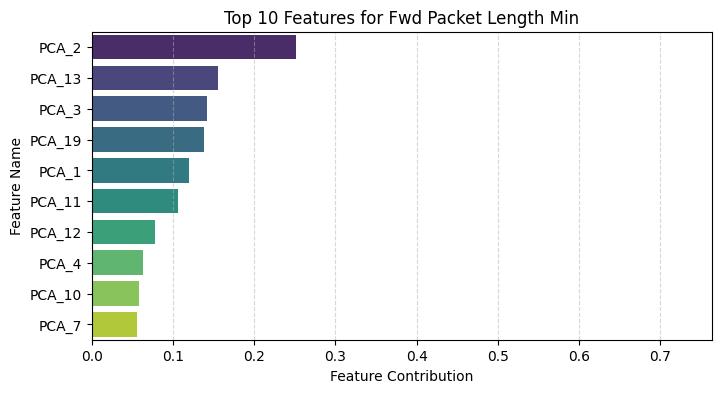


🔍 Top 10 Features Contributing to CWE Flag Count:
PCA_11    0.443509
PCA_14    0.305047
PCA_13    0.170767
PCA_16    0.146211
PCA_2     0.142355
PCA_17    0.124892
PCA_7     0.124162
PCA_5     0.116525
PCA_9     0.103135
PCA_19    0.096641
Name: CWE Flag Count, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


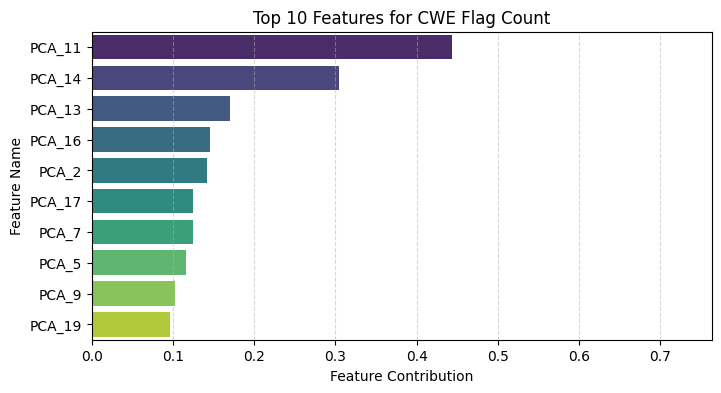


🔍 Top 10 Features Contributing to Fwd Header Length:
PCA_12    0.617177
PCA_13    0.346559
PCA_16    0.092055
PCA_17    0.072386
PCA_20    0.043268
PCA_19    0.042819
PCA_4     0.035208
PCA_14    0.031657
PCA_15    0.030704
PCA_8     0.012045
Name: Fwd Header Length, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


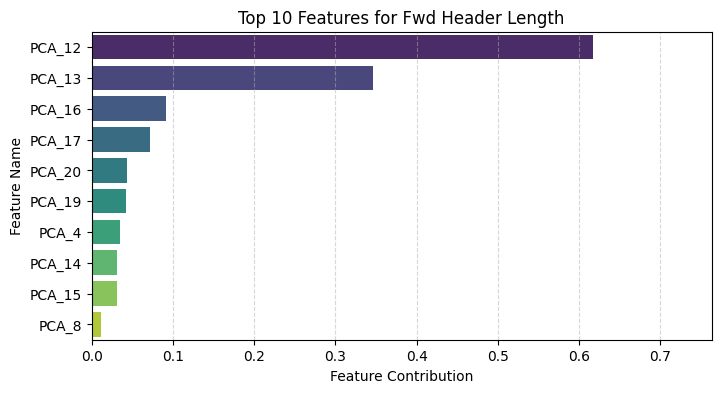


🔍 Top 10 Features Contributing to Bwd IAT Max:
PCA_1     0.205586
PCA_8     0.196431
PCA_9     0.142999
PCA_7     0.111700
PCA_6     0.105445
PCA_5     0.105328
PCA_10    0.092965
PCA_11    0.081437
PCA_4     0.067200
PCA_3     0.066744
Name: Bwd IAT Max, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


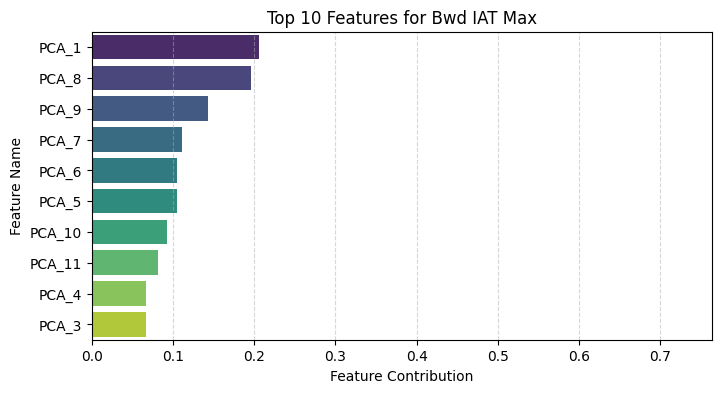


🔍 Top 10 Features Contributing to Active Min:
PCA_6     0.401065
PCA_5     0.277154
PCA_19    0.223814
PCA_15    0.148437
PCA_10    0.148370
PCA_11    0.133685
PCA_14    0.122591
PCA_13    0.120328
PCA_9     0.094633
PCA_17    0.081953
Name: Active Min, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


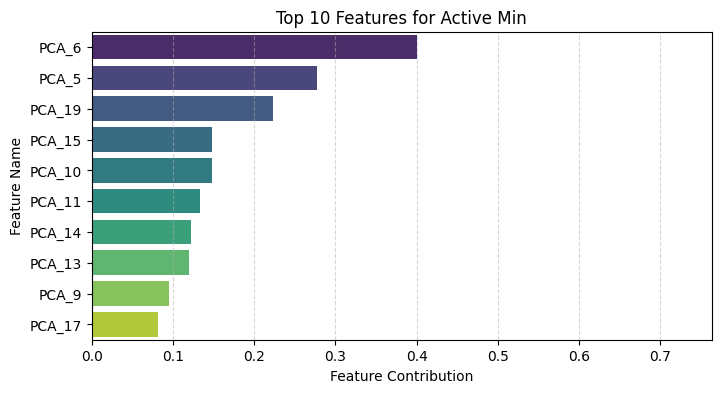


🔍 Top 10 Features Contributing to Bwd Packet Length Std:
PCA_3     0.202804
PCA_7     0.169279
PCA_1     0.156259
PCA_9     0.143876
PCA_2     0.126627
PCA_20    0.108201
PCA_8     0.092597
PCA_15    0.078842
PCA_16    0.077822
PCA_17    0.069996
Name: Bwd Packet Length Std, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


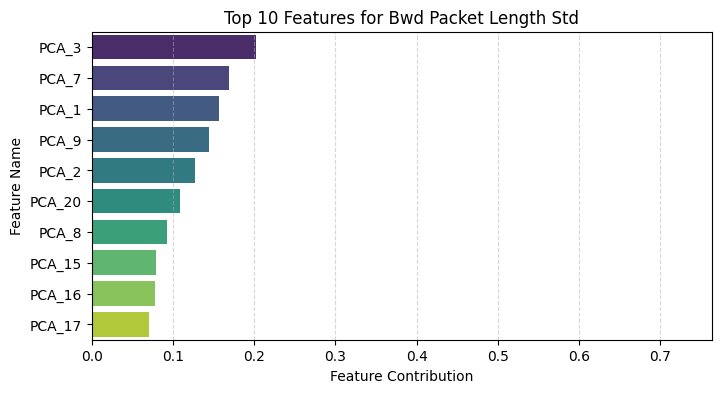


🔍 Top 10 Features Contributing to Bwd IAT Min:
PCA_20    0.674981
PCA_17    0.469807
PCA_16    0.362294
PCA_15    0.264712
PCA_13    0.176111
PCA_19    0.152242
PCA_10    0.098134
PCA_12    0.096937
PCA_9     0.078577
PCA_2     0.075851
Name: Bwd IAT Min, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


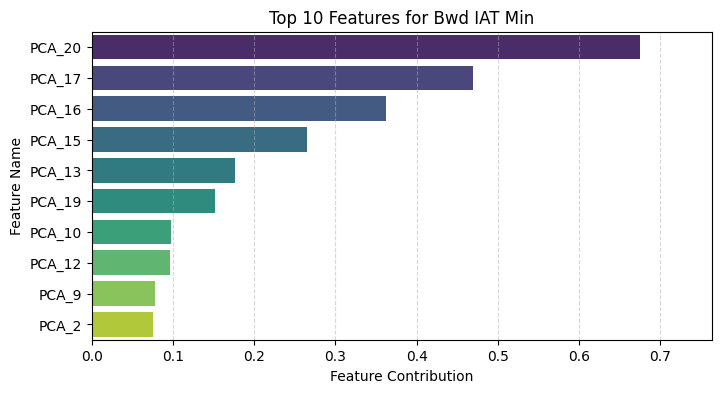


🔍 Top 10 Features Contributing to Bwd Packet Length Min:
PCA_20    0.406872
PCA_13    0.294261
PCA_11    0.292596
PCA_10    0.286007
PCA_17    0.199770
PCA_12    0.156123
PCA_15    0.130338
PCA_16    0.129464
PCA_9     0.119454
PCA_7     0.118760
Name: Bwd Packet Length Min, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


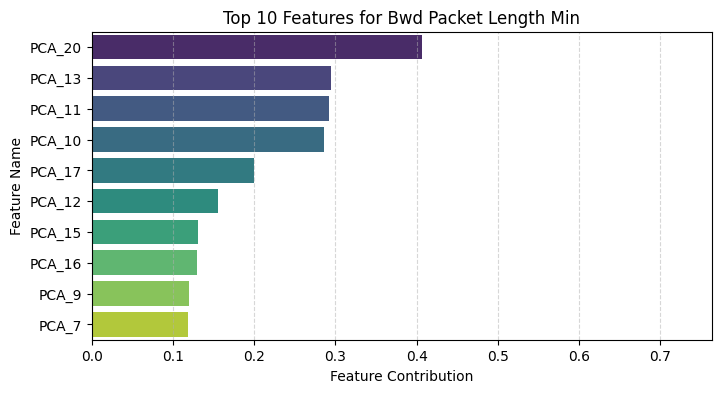


🔍 Top 10 Features Contributing to Packet Length Mean:
PCA_2     0.305336
PCA_13    0.108247
PCA_1     0.093795
PCA_4     0.071674
PCA_11    0.067416
PCA_3     0.062924
PCA_10    0.056353
PCA_12    0.046075
PCA_19    0.040670
PCA_9     0.039859
Name: Packet Length Mean, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


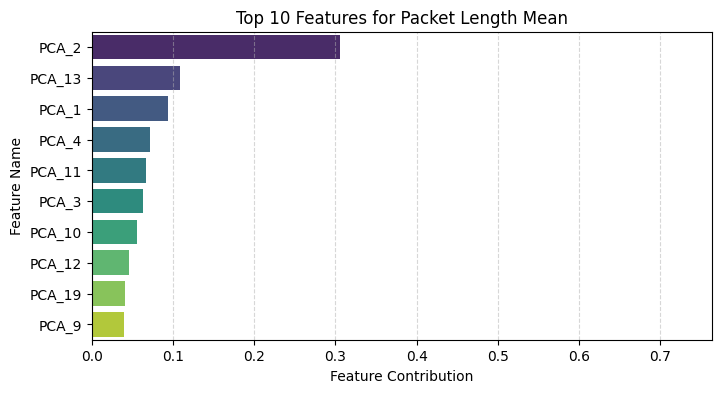


🔍 Top 10 Features Contributing to Down/Up Ratio:
PCA_13    0.252658
PCA_20    0.219509
PCA_11    0.209887
PCA_9     0.199437
PCA_2     0.164499
PCA_3     0.145221
PCA_12    0.134355
PCA_5     0.130598
PCA_15    0.117676
PCA_8     0.093513
Name: Down/Up Ratio, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


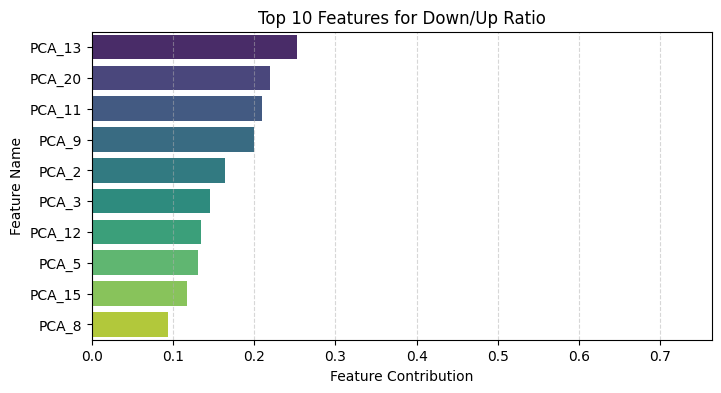


🔍 Top 10 Features Contributing to min_seg_size_forward:
PCA_12    0.617430
PCA_13    0.323777
PCA_19    0.083463
PCA_20    0.063266
PCA_4     0.036698
PCA_14    0.034649
PCA_2     0.029814
PCA_3     0.024998
PCA_7     0.021040
PCA_17    0.016921
Name: min_seg_size_forward, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


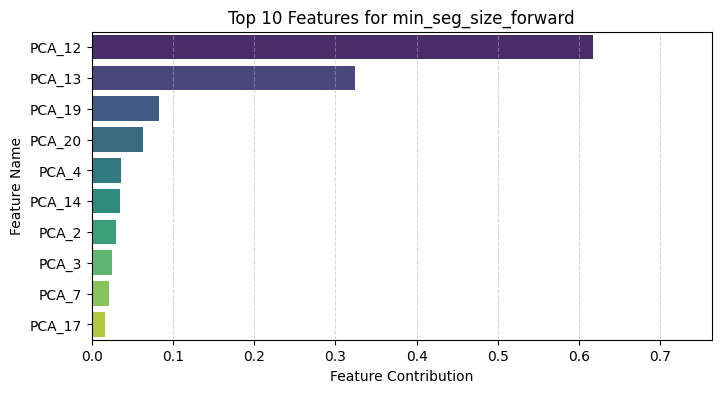


🔍 Top 10 Features Contributing to Bwd Header Length:
PCA_17    0.732217
PCA_16    0.625265
PCA_15    0.189724
PCA_12    0.115595
PCA_20    0.067270
PCA_10    0.057379
PCA_11    0.056821
PCA_19    0.042998
PCA_18    0.040482
PCA_9     0.029959
Name: Bwd Header Length, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


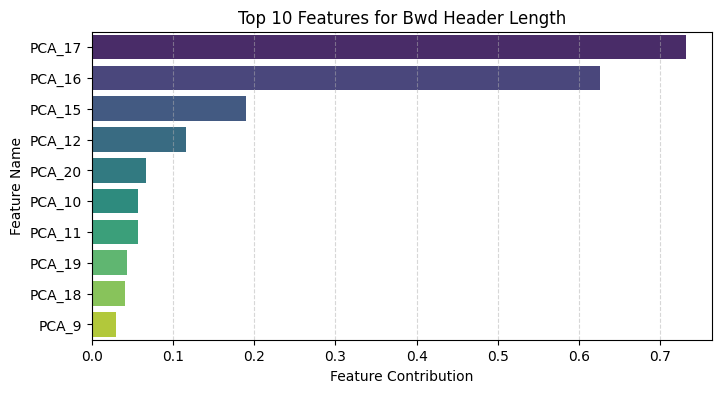


🔍 Top 10 Features Contributing to Init_Win_bytes_forward:
PCA_14    0.314105
PCA_19    0.274471
PCA_8     0.170945
PCA_10    0.164830
PCA_11    0.159688
PCA_13    0.127199
PCA_5     0.124229
PCA_1     0.119130
PCA_16    0.115929
PCA_3     0.083060
Name: Init_Win_bytes_forward, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


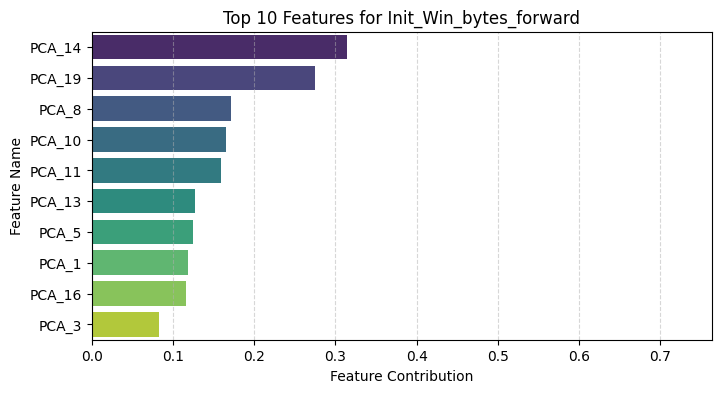


🔍 Top 10 Features Contributing to Bwd Packet Length Mean:
PCA_3     0.231175
PCA_13    0.230746
PCA_7     0.167348
PCA_1     0.131115
PCA_12    0.130336
PCA_19    0.110839
PCA_9     0.106941
PCA_11    0.096014
PCA_8     0.091035
PCA_2     0.088178
Name: Bwd Packet Length Mean, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


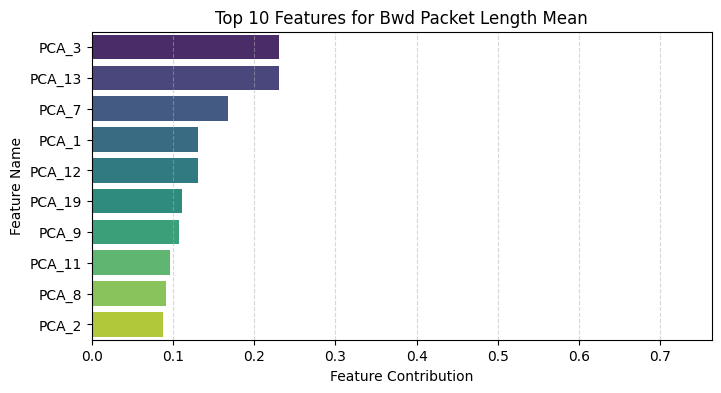


🔍 Top 10 Features Contributing to Fwd Packets Length Total:
PCA_4     0.389572
PCA_19    0.259910
PCA_20    0.181623
PCA_8     0.115794
PCA_16    0.101659
PCA_13    0.097316
PCA_15    0.077588
PCA_2     0.074277
PCA_17    0.069656
PCA_7     0.065208
Name: Fwd Packets Length Total, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


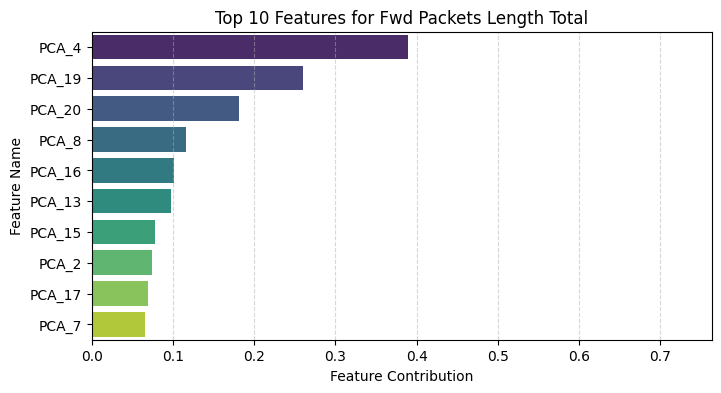


🔍 Top 10 Features Contributing to Packet Length Variance:
PCA_3     0.243360
PCA_2     0.137063
PCA_7     0.107869
PCA_5     0.098023
PCA_1     0.085518
PCA_4     0.068483
PCA_17    0.056558
PCA_15    0.056172
PCA_20    0.055812
PCA_16    0.053326
Name: Packet Length Variance, dtype: float64


/tmp/ipython-input-594/42700311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


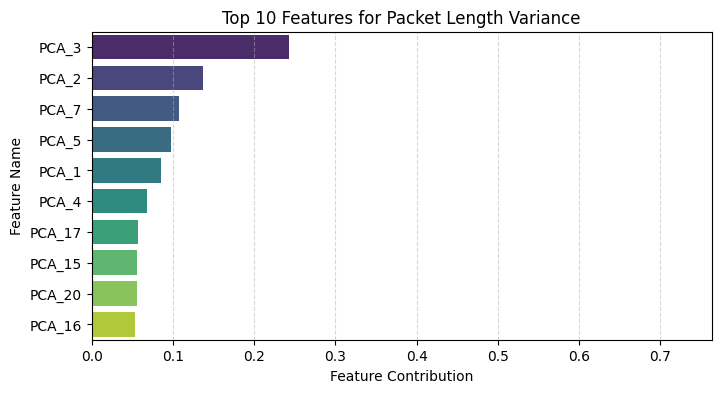

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Set how many top features you want to display per PCA component
top_n = 10

# ✅ Find the maximum absolute contribution value across all components for consistent scaling
max_contribution = pca_loadings_df.abs().max().max()  # Maximum value in the entire DataFrame

# ✅ Loop through all PCA components
for pca_component in pca_loadings_df.columns:
    top_features = pca_loadings_df[pca_component].abs().sort_values(ascending=False).head(top_n)

    # ✅ Print the top contributing features
    print(f"\n🔍 Top {top_n} Features Contributing to {pca_component}:")
    print(top_features)

    # ✅ Plot the bar graph
    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")

    plt.xlabel("Feature Contribution")
    plt.ylabel("Feature Name")
    plt.title(f"Top {top_n} Features for {pca_component}")

    plt.xlim(0, max_contribution)  # ✅ Set the same x-axis range for all plots
    plt.grid(axis="x", linestyle="--", alpha=0.5)

    plt.show()  # Display the plot

In [ ]:
#XAI_INTEGRATION

In [ ]:
!pip install shap

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

📌 SHAP Values Shape: (5000, 20)
📌 X_test_sample Shape: (5000, 20)
🔍 PCA Feature Explanation: PCA_1 (0.21); PCA_2 (0.11); PCA_3 (0.11); PCA_18 (0.09); PCA_11 (0.04)


/tmp/ipython-input-594/1335014942.py:60: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_fixed, X_test_sample, plot_type="bar")


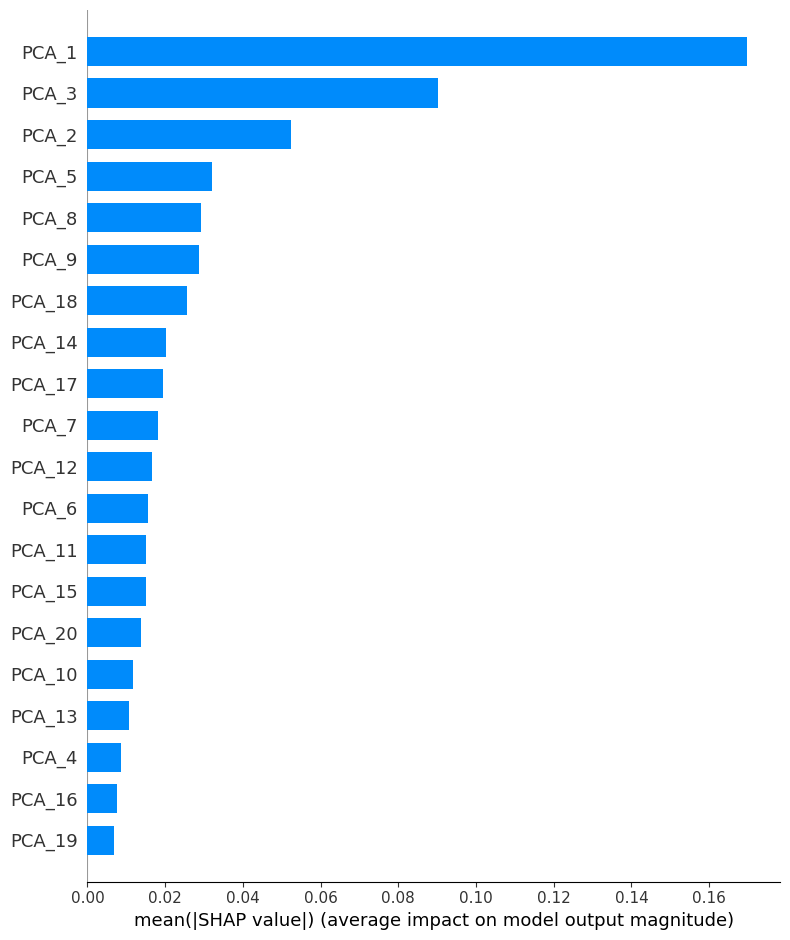

/tmp/ipython-input-594/1335014942.py:61: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_fixed, X_test_sample, plot_type="dot")


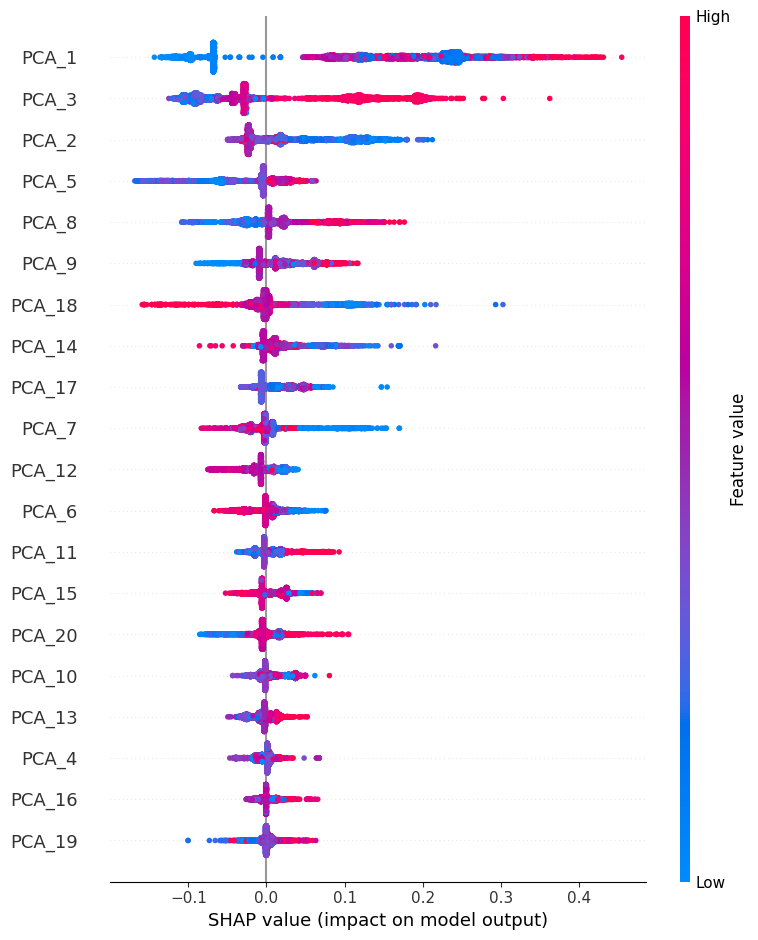

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# ✅ Select Random Forest for SHAP explainability
selected_model = models["Random Forest"]
explainer = shap.TreeExplainer(selected_model)

# ✅ Drop 'Source IP' before SHAP computation
X_test_pca_no_ip = X_test_final.drop(columns=['Source IP'], errors='ignore')

# ✅ Take a random sample of 5,000 rows for faster SHAP computation
sample_size = min(5000, len(X_test_pca_no_ip))
sample_indices = np.random.choice(X_test_pca_no_ip.index, sample_size, replace=False)
X_test_sample = X_test_pca_no_ip.loc[sample_indices]

# ✅ Compute SHAP values
shap_values = explainer.shap_values(X_test_sample)

# ✅ Fix SHAP indexing
if isinstance(shap_values, list):
    shap_values_fixed = shap_values[-1]  # Take the anomaly class
else:
    shap_values_fixed = shap_values

# ✅ Ensure SHAP values are a NumPy array
shap_values_fixed = np.array(shap_values_fixed)

# ✅ Fix shape issue by selecting last class (binary classification fix)
if shap_values_fixed.ndim == 3:
    shap_values_fixed = shap_values_fixed[:, :, -1]  # Take only anomaly class

# ✅ Check shape after fixing
print("📌 SHAP Values Shape:", shap_values_fixed.shape)  # Should match (5000, 20)
print("📌 X_test_sample Shape:", X_test_sample.shape)

# ✅ Function to generate PCA explanations
def get_pca_explanation(ip_index):
    """Returns SHAP explanation using PCA feature names."""
    feature_contributions = shap_values_fixed[ip_index]

    # Ensure SHAP values are a 1D array
    feature_contributions = np.array(feature_contributions).flatten()

    # Sort top 5 important PCA features
    top_features = sorted(
        zip(X_test_sample.columns, feature_contributions),
        key=lambda x: abs(x[1]), reverse=True
    )[:5]

    pca_explanation = [f"{pca_component} ({value:.2f})" for pca_component, value in top_features]

    return "; ".join(pca_explanation)

# ✅ Explain first anomaly
print("🔍 PCA Feature Explanation:", get_pca_explanation(0))

# ✅ SHAP Summary Plot (Bar chart)
shap.summary_plot(shap_values_fixed, X_test_sample, plot_type="bar")
shap.summary_plot(shap_values_fixed, X_test_sample, plot_type="dot")

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# ✅ Select Random Forest for SHAP explainability
selected_model = models["Random Forest"]
explainer = shap.TreeExplainer(selected_model)

# ✅ Drop 'Source IP' before SHAP computation
X_test_pca_no_ip = X_test_final.drop(columns=['Source IP'], errors='ignore')

# ✅ Take a random sample of 5,000 rows for faster SHAP computation
sample_size = min(5000, len(X_test_pca_no_ip))
sample_indices = np.random.choice(X_test_pca_no_ip.index, sample_size, replace=False)
X_test_sample = X_test_pca_no_ip.loc[sample_indices]

# ✅ Step 1: Get predicted probabilities for classification
predictions = selected_model.predict_proba(X_test_sample)
print("📊 Predictions Shape:", predictions.shape)
print("📊 First 10 Predictions:", predictions[:10])

# ✅ Step 2: Classify IPs based on threshold
threshold = 0.6  # You can adjust this based on performance
predicted_labels = (predictions[:, 1] >= threshold).astype(int)
print("🚨 Anomaly Flags (1 = Attack):", predicted_labels[:10])
print(f"⚙️ Total Attacks Detected: {np.sum(predicted_labels)} / {len(predicted_labels)}")

# ✅ Compute SHAP values
shap_values = explainer.shap_values(X_test_sample)

# ✅ Fix SHAP indexing
if isinstance(shap_values, list):
    shap_values_fixed = shap_values[-1]  # Take the anomaly class
else:
    shap_values_fixed = shap_values

# ✅ Ensure SHAP values are a NumPy array
shap_values_fixed = np.array(shap_values_fixed)

# ✅ Fix shape issue by selecting last class (binary classification fix)
if shap_values_fixed.ndim == 3:
    shap_values_fixed = shap_values_fixed[:, :, -1]  # Take only anomaly class

# ✅ Check shape after fixing
print("📌 SHAP Values Shape:", shap_values_fixed.shape)  # Should match (5000, 20)
print("📌 X_test_sample Shape:", X_test_sample.shape)

# ✅ Function to generate PCA explanations
def get_pca_explanation(ip_index):
    """Returns SHAP explanation using PCA feature names."""
    feature_contributions = shap_values_fixed[ip_index]

    # Ensure SHAP values are a 1D array
    feature_contributions = np.array(feature_contributions).flatten()

    # Sort top 5 important PCA features
    top_features = sorted(
        zip(X_test_sample.columns, feature_contributions),
        key=lambda x: abs(x[1]), reverse=True
    )[:5]

    pca_explanation = [f"{pca_component} ({value:.2f})" for pca_component, value in top_features]

    return "; ".join(pca_explanation)

# ✅ Explain first anomaly
print("🔍 PCA Feature Explanation:", get_pca_explanation(0))

# ✅ SHAP Summary Plot (Bar chart)
shap.summary_plot(shap_values_fixed, X_test_sample, plot_type="bar")
shap.summary_plot(shap_values_fixed, X_test_sample, plot_type="dot")

# ✅ Loop over IPs and add label check to ensure correct SHAP visualization
for ip_index in range(len(X_test_sample)):
    # ✅ Step 1: Get predicted label
    ip_label = predicted_labels[ip_index]  # Use the predicted label (0 = Normal, 1 = Anomalous)

    # ✅ Step 2: Ensure SHAP plot only for matching predicted label
    if ip_label == 1:  # If the IP is flagged as anomalous
        print(f"IP {ip_index} is flagged as anomalous (Model Prediction: {ip_label})")

        # Generate SHAP explanation
        shap_value = shap.Explanation(
            values=shap_values_fixed[ip_index],
            base_values=explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value,
            data=X_test_sample.iloc[ip_index],
            feature_names=X_test_sample.columns
        )

        # ✅ Show all PCA components
        shap.plots.waterfall(shap_value, max_display=X_test_sample.shape[1])
        plt.show()

    elif ip_label == 0:  # If the IP is flagged as normal
        print(f"IP {ip_index} is flagged as normal (Model Prediction: {ip_label})")

        # Generate SHAP explanation (optional if you want to visualize normal ones too)
        shap_value = shap.Explanation(
            values=shap_values_fixed[ip_index],
            base_values=explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value,
            data=X_test_sample.iloc[ip_index],
            feature_names=X_test_sample.columns
        )

        # ✅ Show all PCA components (optional for normal IPs)
        shap.plots.waterfall(shap_value, max_display=X_test_sample.shape[1])
        plt.show()

In [ ]:
print("📌 SHAP Values Fixed Shape:", shap_values_fixed.shape)
print("📌 PCA Loadings Shape:", pca_loadings.shape)

In [ ]:
#BLOCKCHAIN_INTEGRATION

In [ ]:
!pip install web3

In [ ]:
!pip install web3 python-dotenv

In [ ]:
import os
from web3 import Web3
from getpass import getpass  # Securely enter private key

# ✅ Use a public Sepolia RPC URL
RPC_URL = "https://ethereum-sepolia-rpc.publicnode.com"
web3 = Web3(Web3.HTTPProvider(RPC_URL))

# ✅ Check connection
if web3.is_connected():
    print("✅ Connected to Ethereum Sepolia Testnet")
else:
    print("❌ Connection failed!")

# ✅ Enter private key securely
private_key = getpass("Enter your private key securely: ")

if private_key:
    # ✅ Derive Ethereum address from private key
    account = web3.eth.account.from_key(private_key)
    your_address = account.address  # Extract address
    print(f"✅ Ethereum Address Loaded: {your_address}")

    # ✅ Set the default account
    web3.eth.default_account = your_address
else:
    print("❌ Error: Private key is missing!")
    exit()  # Exit the script if the private key is missing

In [ ]:
# Replace with your deployed contract address
CONTRACT_ADDRESS = "0x540cC923912B3B24BE7287B2d4eeF92A3c127C30"

# Contract ABI (Copy from Remix after deploying)
CONTRACT_ABI = [
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "ip",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "reason",
				"type": "string"
			}
		],
		"name": "addToBlacklist",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "ip",
				"type": "string"
			}
		],
		"name": "addToWhitelist",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [],
		"stateMutability": "nonpayable",
		"type": "constructor"
	},
	{
		"anonymous": False,
		"inputs": [
			{
				"indexed": False,
				"internalType": "string",
				"name": "ip",
				"type": "string"
			},
			{
				"indexed": False,
				"internalType": "string",
				"name": "reason",
				"type": "string"
			},
			{
				"indexed": False,
				"internalType": "uint256",
				"name": "timestamp",
				"type": "uint256"
			}
		],
		"name": "AnomalyDetected",
		"type": "event"
	},
	{
		"anonymous": False,
		"inputs": [
			{
				"indexed": False,
				"internalType": "string",
				"name": "ip",
				"type": "string"
			},
			{
				"indexed": False,
				"internalType": "string",
				"name": "listType",
				"type": "string"
			},
			{
				"indexed": False,
				"internalType": "string",
				"name": "reason",
				"type": "string"
			}
		],
		"name": "IPAdded",
		"type": "event"
	},
	{
		"anonymous": False,
		"inputs": [
			{
				"indexed": False,
				"internalType": "string",
				"name": "ip",
				"type": "string"
			},
			{
				"indexed": False,
				"internalType": "string",
				"name": "listType",
				"type": "string"
			}
		],
		"name": "IPRemoved",
		"type": "event"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "ip",
				"type": "string"
			}
		],
		"name": "removeFromBlacklist",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "ip",
				"type": "string"
			}
		],
		"name": "removeFromWhitelist",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "ip",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "reason",
				"type": "string"
			}
		],
		"name": "triggerTestAnomaly",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "ip",
				"type": "string"
			}
		],
		"name": "getAnomalyExplanation",
		"outputs": [
			{
				"internalType": "string",
				"name": "",
				"type": "string"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "getBlacklistedIPs",
		"outputs": [
			{
				"internalType": "string[]",
				"name": "",
				"type": "string[]"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "getWhitelistedIPs",
		"outputs": [
			{
				"internalType": "string[]",
				"name": "",
				"type": "string[]"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "ip",
				"type": "string"
			}
		],
		"name": "isBlacklisted",
		"outputs": [
			{
				"internalType": "bool",
				"name": "",
				"type": "bool"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "ip",
				"type": "string"
			}
		],
		"name": "isWhitelisted",
		"outputs": [
			{
				"internalType": "bool",
				"name": "",
				"type": "bool"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "owner",
		"outputs": [
			{
				"internalType": "address",
				"name": "",
				"type": "address"
			}
		],
		"stateMutability": "view",
		"type": "function"
	}
]

In [ ]:
contract = web3.eth.contract(address=CONTRACT_ADDRESS, abi=CONTRACT_ABI)

print("✅ Contract loaded successfully!")

In [ ]:
print(f"✅ Contract Address: {contract.address}")

In [ ]:
user_address = "0x540cC923912B3B24BE7287B2d4eeF92A3c127C30"  # Replace with an actual address
is_blacklisted = contract.functions.isBlacklisted(user_address).call()

print(f"🚀 Is {user_address} blacklisted? {is_blacklisted}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# ✅ Step 1: Debugging and Validation (From First Block)
print(train_df.groupby("Source IP")["Label"].nunique().sort_values(ascending=False).head(10))

# Ensure `y_pred_labels` exists
if "y_pred_labels" not in locals():
    print("`y_pred_labels` is not defined. Predicting labels again...")
    y_pred_labels = model.predict(X_test_pca)  # Predict labels again
    print("Generated `y_pred_labels`:", y_pred_labels.shape)

# Ensure `y_pred_labels` has the correct shape
if len(y_pred_labels) != len(test_source_ips):
    print("Mismatch detected! Fixing `y_pred_labels`...")
    y_pred_labels = model.predict(X_test_pca)  # Ensure correct size
    print("Updated Predicted Labels shape:", y_pred_labels.shape)

# Print explained variance by PCA
print(f"Explained Variance by PCA: {np.sum(pca.explained_variance_ratio_):.4f}")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# ✅ Step 1: Ensure Predictions Exist
y_pred_labels = model.predict(X_test_pca)  # Get predicted labels (1 for anomaly, 0 for normal)
print("Model does not support probability estimation. Using predicted labels as scores.")

# ✅ Step 2: Ensure Anomaly Scores are 1D
anomaly_scores = np.array(y_pred_labels).flatten()
print(f"anomaly_scores shape after flattening: {anomaly_scores.shape}")

# ✅ Step 3: DataFrame Creation (do this before labeling)
scores_df = pd.DataFrame({
    "IP": np.array(test_source_ips).flatten(),
    "Anomaly_Score": anomaly_scores,
    "Predicted_Label": y_pred_labels
})
print(scores_df.head())

# 🔹 Fix: Ensure each IP has a single label (-1 = anomaly, 1 = normal)
# If **any** anomaly (-1) is present for an IP, flag it as anomaly
scores_df["Final_Label"] = scores_df.groupby("IP", observed=True)["Predicted_Label"].transform(
    lambda x: -1 if -1 in x.values else 1
)
scores_df.drop(columns=["Predicted_Label"], inplace=True)
scores_df.rename(columns={"Final_Label": "Predicted_Label"}, inplace=True)

# ✅ Verify all IPs now have exactly one label
print(scores_df.groupby("IP", observed=True)["Predicted_Label"].nunique().value_counts())

# 🔹 Step 4: Scale Anomaly Scores
scaler = MinMaxScaler(feature_range=(-1, 1))
scores_df["Scaled_Anomaly_Score"] = scaler.fit_transform(scores_df[["Anomaly_Score"]])
print("Scaled Min anomaly score:", scores_df["Scaled_Anomaly_Score"].min())
print("Scaled Max anomaly score:", scores_df["Scaled_Anomaly_Score"].max())

# ✅ Step 5: Create IP → Label decision dictionary (for blockchain logic)
ip_decision = scores_df.groupby("IP", observed=False)["Predicted_Label"].last().to_dict()


In [ ]:
import smtplib
import time
from collections import deque
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from datetime import datetime

# ✅ SMTP Email Configuration
SMTP_SERVER = "smtp.gmail.com"
SMTP_PORT = 587
SENDER_EMAIL = "mjproject2025@gmail.com"       # Email that sends alerts
ADMIN_EMAIL = "mjproject2025@gmail.com"        # Receives bulk alerts
SENDER_PASSWORD = "smlc uwfu lwta ewdm"         # App password
DEFAULT_USER_EMAIL = "mjrproject2025@gmail.com" # Receiver for single IP alert (fallback)

# ✅ Function to Log Blacklisted IPs
def log_blacklisted_ip(ip, reason):
    timestamp = time.strftime("%Y-%m-%d %H:%M:%S")
    log_entry = f"[{timestamp}] 🚨 BLACKLISTED: {ip} | Reason: {reason}\n"

    with open("blacklist_log.txt", "a") as log_file:
        log_file.write(log_entry)

    print(log_entry.strip())

# ✅ Track Recent Blacklisted IPs
blacklist_queue = deque()  # Stores (timestamp, ip)

# ✅ Admin Notification Cooldown Setup
last_admin_notification_time = 0  # Timestamp of last admin alert
admin_notification_interval = 600  # 10-minute cooldown in seconds

def track_blacklist(ip, reason, user_email=DEFAULT_USER_EMAIL):
    global blacklist_queue, last_admin_notification_time
    current_time = time.time()

    log_blacklisted_ip(ip, reason)

    # Remove IPs older than 10 minutes
    while blacklist_queue and (current_time - blacklist_queue[0][0]) > 600:
        blacklist_queue.popleft()

    blacklist_queue.append((current_time, ip))

    # Send email to user
    send_email_to_user(ip, reason, user_email)

    # Notify admin only if enough IPs and cooldown passed
    if len(blacklist_queue) >= 5 and (current_time - last_admin_notification_time > admin_notification_interval):
        notify_admin(blacklist_queue)
        last_admin_notification_time = current_time  # Update cooldown

from datetime import datetime

def send_email_to_user(ip, reason, user_email):
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    message_body = f"""
    <html>
    <head>
      <style>
        .container {{
          font-family: Arial, sans-serif;
          background-color: #f9f9f9;
          padding: 20px;
          border-radius: 10px;
          border: 1px solid #ddd;
          max-width: 600px;
          margin: auto;
        }}
        .header {{
          background-color: #d32f2f;
          color: white;
          padding: 15px;
          text-align: center;
          border-radius: 10px 10px 0 0;
          font-size: 20px;
          font-weight: bold;
        }}
        .content {{
          padding: 20px;
          background-color: white;
          border-radius: 0 0 10px 10px;
        }}
        .info-box {{
          background-color: #f0f0f0;
          padding: 10px;
          margin: 10px 0;
          border-radius: 8px;
          font-weight: bold;
        }}
        .footer {{
          font-size: 12px;
          color: #888;
          margin-top: 20px;
          text-align: center;
        }}
      </style>
    </head>
    <body>
      <div class="container">
        <div class="header">
          🚨 Security Alert: IP Blacklisted
        </div>
        <div class="content">
          <p>Dear User,</p>
          <p>The following IP address has been flagged for suspicious activity and has been added to the blacklist:</p>

          <div class="info-box">🔍 <b>IP Address:</b> {ip}</div>
          <div class="info-box">🧠 <b>Reason:</b> {reason}</div>
          <div class="info-box">📅 <b>Detected On:</b> {timestamp}</div>

          <p>Immediate actions have been taken to block further access from this IP.</p>

          <p class="footer">This is an automated alert from your intrusion detection system. Please do not reply to this email.</p>
        </div>
      </div>
    </body>
    </html>
    """

    try:
        message = MIMEMultipart("alternative")
        message["Subject"] = f"🚨 Security Alert: IP {ip} Blacklisted!"
        message["From"] = SENDER_EMAIL
        message["To"] = user_email
        message.attach(MIMEText(message_body, "html"))

        with smtplib.SMTP(SMTP_SERVER, SMTP_PORT) as server:
            server.starttls()
            server.login(SENDER_EMAIL, SENDER_PASSWORD)
            server.sendmail(SENDER_EMAIL, user_email, message.as_string())

        print(f"📧 ✅ Email successfully sent to {user_email} for {ip} 🚨")
    except Exception as e:
        print(f"❌ Failed to send user email for {ip}: {str(e)}")


# ✅ Function to Notify Admin If Many IPs Are Blacklisted
def notify_admin(blacklisted_ips):
    try:
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

        subject = "🚨 URGENT: Multiple IPs Blacklisted!"
        message_body = f"""
        <html>
        <head>
          <style>
            .container {{
              font-family: Arial, sans-serif;
              background-color: #fff3f3;
              padding: 20px;
              border-radius: 10px;
              border: 1px solid #e57373;
              max-width: 700px;
              margin: auto;
            }}
            .header {{
              background-color: #b71c1c;
              color: white;
              padding: 15px;
              text-align: center;
              border-radius: 10px 10px 0 0;
              font-size: 22px;
              font-weight: bold;
            }}
            .content {{
              padding: 20px;
              background-color: white;
              border-radius: 0 0 10px 10px;
            }}
            .info-list {{
              background-color: #ffe6e6;
              padding: 15px;
              border-radius: 8px;
              margin-top: 15px;
              border: 1px solid #f44336;
            }}
            .info-list ul {{
              padding-left: 20px;
            }}
            .info-list li {{
              font-weight: bold;
              color: #d32f2f;
              margin-bottom: 5px;
            }}
            .footer {{
              font-size: 12px;
              color: #888;
              margin-top: 20px;
              text-align: center;
            }}
          </style>
        </head>
        <body>
          <div class="container">
            <div class="header">
              🚨 URGENT: Multiple IPs Blacklisted!
            </div>
            <div class="content">
              <p>Dear Admin,</p>
              <p>The following IP addresses have been blacklisted within the last 10 minutes:</p>
              <div class="info-list">
                <ul>
                  {''.join(f"<li>{ip}</li>" for _, ip in blacklisted_ips)}
                </ul>
              </div>
              <p>Please review and take any necessary action.</p>
              <p class="footer">Detected On: {timestamp} | Automated alert from the IDS</p>
            </div>
          </div>
        </body>
        </html>
        """

        msg = MIMEMultipart()
        msg["From"] = SENDER_EMAIL
        msg["To"] = ADMIN_EMAIL
        msg["Subject"] = subject
        msg.attach(MIMEText(message_body, "html"))

        with smtplib.SMTP(SMTP_SERVER, SMTP_PORT) as server:
            server.starttls()
            server.login(SENDER_EMAIL, SENDER_PASSWORD)
            server.sendmail(SENDER_EMAIL, ADMIN_EMAIL, msg.as_string())

        print(f"📧 Admin Notified: Bulk alert sent to {ADMIN_EMAIL}")

    except Exception as e:
        print(f"❌ Failed to notify admin: {str(e)}")


# ✅ Example Test
track_blacklist("192.168.1.10", "Unusual traffic pattern detected", "mjrproject2025@gmail.com")

# ✅ Test the email function
send_email_to_user("192.168.1.10", "Unusual packet behavior detected", "mjrproject2025@gmail.com")

In [ ]:
import pandas as pd
import numpy as np

def get_top_features_per_pca(pca, feature_names, top_k=5):
    """
    Returns a dictionary with PCA component names as keys and the top contributing features as values.
    """
    pca_components = pca.components_
    top_features_dict = {}

    for i, component in enumerate(pca_components):
        # Get indices of top absolute values (strongest contributions)
        top_indices = np.argsort(np.abs(component))[::-1][:top_k]
        top_features = [feature_names[j] for j in top_indices]

        top_features_dict[f'PCA{i+1}'] = top_features

    return top_features_dict
# Assuming `pca` is your fitted PCA model
# and `original_feature_names` is a list of the features *before* PCA

top_features_per_component = get_top_features_per_pca(pca, original_feature_names, top_k=10)

# Print them out
for comp, features in top_features_per_component.items():
    print(f"\n🔷 {comp}")
    for feat in features:
        print(f" - {feat}")


In [ ]:
import numpy as np

# ✅ Mapping and setup
ip_decision = scores_df.groupby("IP", observed=False)["Predicted_Label"].last().to_dict()
ip_index_mapping = {str(ip).strip(): idx for idx, ip in enumerate(scores_df["IP"].unique())}

user_email = "mjrproject2025@gmail.com"
latest_gas_price = web3.eth.gas_price
adjusted_gas_price = int(latest_gas_price * 1.3)
processed_ips = set()

# Simple human-readable explanations for each PCA component
pca_alert_reasons = {
    "PCA 1": "This IP was flagged because the time between the data sent seems too long or too short compared to usual behavior. This could mean the IP is being used in suspicious activity, like scanning or a slow attack.",
    "PCA 2": "This IP is sending data that is either too big or too small, and the size keeps changing. This is abnormal and might mean the IP is involved in malicious activity, so we flagged it.",
    "PCA 3": "The data this IP is sending back to the server is different from what we usually see. This could mean the IP is trying to steal information or do something harmful, so it was flagged.",
    "PCA 4": "This IP is sending an unusual amount of data in a short time. Such behavior could indicate the IP is part of a malicious activity, like sending spam or doing an attack, so we flagged it.",
    "PCA 5": "The activity from this IP is either too high or too low, which is not normal. It could be a sign of a bot or some kind of attack, so this IP was flagged.",
    "PCA 6": "The way this IP is interacting with the server is strange. The timing of the data and the actions it's taking are unusual, which could mean it's part of an attack or scan, so we flagged it.",
    "PCA 7": "The returning data from this IP is behaving oddly, which suggests that the IP might be involved in suspicious activities, like trying to access things it shouldn't. That's why it was flagged.",
    "PCA 8": "This IP has unusual patterns in the way it's sending data, which can be a sign of malicious activity. That's why we flagged it.",
    "PCA 9": "The way this IP is sending data and interacting with the server is strange. This unusual behavior might point to an attack, so we flagged it.",
    "PCA 10": "The data this IP is sending doesn’t match usual patterns. It’s either too much or too little, which suggests that something suspicious might be going on, so we flagged it.",
    "PCA 11": "This IP has odd activity patterns and behaves differently than expected. This might be a sign of scanning or probing for weaknesses, so we flagged it.",
    "PCA 12": "The data this IP is sending is either too big or too small, and the timing is off. This is unusual and could indicate that the IP is trying to do something harmful, so it was flagged.",
    "PCA 13": "This IP is acting in a strange way by sending odd amounts of data and at unusual times. This suggests it might be involved in an attack, so we flagged it.",
    "PCA 14": "This IP is sending data with unusual timing and behavior, which doesn’t match normal patterns. This could indicate malicious intent, so we flagged the IP.",
    "PCA 15": "This IP is sending an odd amount of returning data, which is not normal. This behavior could be part of an attack, so we flagged it.",
    "PCA 16": "The way this IP is interacting with the server and sending data is unusual. This could indicate malicious intent, so we flagged the IP.",
    "PCA 17": "This IP is showing strange behavior and sending unexpected data. It looks suspicious and could be part of an attack, so we flagged it.",
    "PCA 18": "The data this IP is sending and the way it’s behaving are unusual. These strange patterns could mean the IP is involved in an attack, so we flagged it.",
    "PCA 19": "The IP is sending too much data, or the amount of data is inconsistent with normal traffic. This behavior could indicate an attack, so we flagged it.",
    "PCA 20": "This IP is showing strange patterns with its returning data and the amount of data being sent. This could mean the IP is involved in suspicious activities, so we flagged it."
}

# ✅ SHAP explanation
def get_shap_explanation(ip):
    ip = str(ip).strip()  # Normalize IP
    if ip not in ip_index_mapping:
        return "Unknown reason"
    try:
        ip_index = int(ip_index_mapping[ip])
        if len(shap_values.shape) == 3 and shap_values.shape[2] == 2:
            shap_values_for_ip = shap_values[ip_index, :, 1]
        elif len(shap_values.shape) == 2:
            shap_values_for_ip = shap_values[ip_index, :]
        else:
            return "Unexpected SHAP format"

        # Get the top 2 contributing PCA components
        top_indices = np.argsort(np.abs(shap_values_for_ip))[-2:]

        # Retrieve the human-readable explanations for the top 2 contributing PCA components
        reasons = []
        for idx in top_indices:
            pca_component = f"PCA {idx + 1}"
            reason = pca_alert_reasons.get(pca_component, f"{pca_component} contributed significantly.")
            reasons.append(reason)

        # Join the explanations with ' & ' for better readability
        return " & ".join(reasons)
    except Exception as e:
        return f"Error: {e}"


# ✅ Truncate explanation with more context
def truncate_reason(reason, max_length=200):
    sentences = reason.split(". ")
    truncated_reason = ""
    for sentence in sentences:
        if len(truncated_reason + sentence) <= max_length:
            truncated_reason += sentence + ". "
        else:
            break
    return truncated_reason.strip()[:max_length]

# ✅ Core Function with more explanation
def process_ip(ip, label):
    global processed_ips
    ip = str(ip).strip()

    if ip in processed_ips:
        print(f"Skipping {ip} - already processed.")
        return

    try:
        ip_index = ip_index_mapping.get(ip, None)
        if ip_index is None:
            print(f"Skipping {ip} - not in index mapping.")
            return

        txn = None
        nonce = web3.eth.get_transaction_count(your_address, "pending")

        if label == -1:  # Blacklist
            if contract.functions.isBlacklisted(ip).call():
                print(f"{ip} is already blacklisted.")
                processed_ips.add(ip)
                return

            reason = get_shap_explanation(ip)
            reason = truncate_reason(reason)  # Truncate reason before sending email

            txn = contract.functions.addToBlacklist(ip, reason).build_transaction({
                "from": your_address,
                "gasPrice": adjusted_gas_price,
                "nonce": nonce,
            })

            try:
                track_blacklist(ip, reason, user_email)
            except Exception:
                pass

            print(f"{ip} added to blacklist. Reason: {reason}")

        else:  # Whitelist
            if contract.functions.isWhitelisted(ip).call():
                print(f"{ip} is already whitelisted.")
                processed_ips.add(ip)
                return

            txn = contract.functions.addToWhitelist(ip).build_transaction({
                "from": your_address,
                "gasPrice": adjusted_gas_price,
                "nonce": nonce,
            })

            print(f"{ip} added to whitelist. ✅")

        processed_ips.add(ip)

    except Exception as e:
        print(f"Error processing {ip}: {e}")

# ✅ Apply the function to all IPs
for ip, label in ip_decision.items():
    process_ip(ip, label)


In [ ]:
print("Total IPs in decision:", len(ip_decision))
print("Anomalous IPs:", sum(1 for v in ip_decision.values() if v == -1))
print("Normal IPs:", sum(1 for v in ip_decision.values() if v == 1))


In [ ]:
#DIFFERENT TEST DATASET

In [ ]:
import pandas as pd
import pickle

# Drop Label and Source IP from input features
X = df.drop(columns=["Label", "Source IP"], errors="ignore")

# Handle NaNs and Infs (important!)
X = X.fillna(0).replace([float('inf'), float('-inf')], 1e10)

# ✅ Save the original column names before scaling or PCA
trained_columns = X.columns.tolist()
with open('trained_columns.pkl', 'wb') as f:
    pickle.dump(trained_columns, f)

# ✅ Fit scaler and PCA (you must have already defined them earlier)
X_scaled = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_scaled)

print("✅ Columns saved, scaler and PCA fitted!")


In [ ]:
import pandas as pd
import pickle

pca_alert_reasons = {
    "PCA 1": "This IP was flagged because the time between the data sent seems too long or too short compared to usual behavior. This could mean the IP is being used in suspicious activity, like scanning or a slow attack.",
    "PCA 2": "This IP is sending data that is either too big or too small, and the size keeps changing. This is abnormal and might mean the IP is involved in malicious activity, so we flagged it.",
    "PCA 3": "The data this IP is sending back to the server is different from what we usually see. This could mean the IP is trying to steal information or do something harmful, so it was flagged.",
    "PCA 4": "This IP is sending an unusual amount of data in a short time. Such behavior could indicate the IP is part of a malicious activity, like sending spam or doing an attack, so we flagged it.",
    "PCA 5": "The activity from this IP is either too high or too low, which is not normal. It could be a sign of a bot or some kind of attack, so this IP was flagged.",
    "PCA 6": "The way this IP is interacting with the server is strange. The timing of the data and the actions it's taking are unusual, which could mean it's part of an attack or scan, so we flagged it.",
    "PCA 7": "The returning data from this IP is behaving oddly, which suggests that the IP might be involved in suspicious activities, like trying to access things it shouldn't. That's why it was flagged.",
    "PCA 8": "This IP has unusual patterns in the way it's sending data, which can be a sign of malicious activity. That's why we flagged it.",
    "PCA 9": "The way this IP is sending data and interacting with the server is strange. This unusual behavior might point to an attack, so we flagged it.",
    "PCA 10": "The data this IP is sending doesn’t match usual patterns. It’s either too much or too little, which suggests that something suspicious might be going on, so we flagged it.",
    "PCA 11": "This IP has odd activity patterns and behaves differently than expected. This might be a sign of scanning or probing for weaknesses, so we flagged it.",
    "PCA 12": "The data this IP is sending is either too big or too small, and the timing is off. This is unusual and could indicate that the IP is trying to do something harmful, so it was flagged.",
    "PCA 13": "This IP is acting in a strange way by sending odd amounts of data and at unusual times. This suggests it might be involved in an attack, so we flagged it.",
    "PCA 14": "This IP is sending data with unusual timing and behavior, which doesn’t match normal patterns. This could indicate malicious intent, so we flagged the IP.",
    "PCA 15": "This IP is sending an odd amount of returning data, which is not normal. This behavior could be part of an attack, so we flagged it.",
    "PCA 16": "The way this IP is interacting with the server and sending data is unusual. This could indicate malicious intent, so we flagged the IP.",
    "PCA 17": "This IP is showing strange behavior and sending unexpected data. It looks suspicious and could be part of an attack, so we flagged it.",
    "PCA 18": "The data this IP is sending and the way it’s behaving are unusual. These strange patterns could mean the IP is involved in an attack, so we flagged it.",
    "PCA 19": "The IP is sending too much data, or the amount of data is inconsistent with normal traffic. This behavior could indicate an attack, so we flagged it.",
    "PCA 20": "This IP is showing strange patterns with its returning data and the amount of data being sent. This could mean the IP is involved in suspicious activities, so we flagged it."
}
# Initialize shap_values_list
shap_values_list = []

# Define the handle_new_packet function first
def handle_new_packet(packet_df):
    """
    Handles a new incoming packet: preprocessing, prediction, SHAP explanation, and alerting.
    Only stores SHAP + sends alert if the IP is anomalous.
    """
    try:
        # ✅ Extract source IP & drop from data
        src_ip = packet_df["Source IP"].values[0].strip()
        data_no_ip = packet_df.drop(columns=["Source IP"], errors="ignore")

        # ✅ Align with training columns
        with open('trained_columns.pkl', 'rb') as f:
            trained_columns = pickle.load(f)

        for col in trained_columns:
            if col not in data_no_ip.columns:
                data_no_ip[col] = 0
        data_aligned = data_no_ip[trained_columns]

        # ✅ Apply preprocessing
        data_scaled = scaler.transform(data_aligned)
        data_pca = pca.transform(data_scaled)

        # ✅ Predict
        label = selected_model.predict(data_pca)[0]

        if label == -1:  # Only act if anomalous
            # ✅ SHAP explanation
            shap_val = explainer.shap_values(data_pca)
            shap_val = shap_val[-1] if isinstance(shap_val, list) else shap_val
            shap_val = shap_val[0]

            # ✅ Get top PCA components
            top_indices = np.argsort(np.abs(shap_val))[-2:]
            reasons = []
            for idx in top_indices:
                pca_component = f"PCA {idx + 1}"
                reason = pca_alert_reasons.get(pca_component, f"{pca_component} contributed significantly.")
                reasons.append(reason)
            final_reason = " & ".join(reasons)

            # ✅ Store for blockchain
            ip_index_mapping[src_ip] = len(ip_index_mapping)
            shap_values_list.append(shap_val)
            ip_decision[src_ip] = label

            # ✅ Blockchain + Email Alert
            process_ip(src_ip, label)
            send_email_to_user(src_ip, final_reason, DEFAULT_USER_EMAIL)

            print(f"🚨 Anomalous IP detected: {src_ip}")
            print(f"🔍 Reason: {final_reason}")
        else:
            print(f"✅ Normal IP: {src_ip}")

    except Exception as e:
        print(f"❌ Error in packet processing: {e}")


In [ ]:
# Load the trained columns
with open('trained_columns.pkl', 'rb') as f:
    trained_columns = pickle.load(f)

# ✅ Now you can safely call your function with dummy or real data!
dummy_packet = {col: [0] for col in trained_columns}
dummy_packet_df = pd.DataFrame(dummy_packet)

# Add a dummy Source IP
dummy_packet_df["Source IP"] = ["192.168.1.114"]

# Now call the handler!
handle_new_packet(dummy_packet_df)

In [ ]:
import pandas as pd
import pickle

pca_alert_reasons = {
    "PCA 1": "This IP was flagged because the time between the data sent seems too long or too short compared to usual behavior. This could mean the IP is being used in suspicious activity, like scanning or a slow attack.",
    "PCA 2": "This IP is sending data that is either too big or too small, and the size keeps changing. This is abnormal and might mean the IP is involved in malicious activity, so we flagged it.",
    "PCA 3": "The data this IP is sending back to the server is different from what we usually see. This could mean the IP is trying to steal information or do something harmful, so it was flagged.",
    "PCA 4": "This IP is sending an unusual amount of data in a short time. Such behavior could indicate the IP is part of a malicious activity, like sending spam or doing an attack, so we flagged it.",
    "PCA 5": "The activity from this IP is either too high or too low, which is not normal. It could be a sign of a bot or some kind of attack, so this IP was flagged.",
    "PCA 6": "The way this IP is interacting with the server is strange. The timing of the data and the actions it's taking are unusual, which could mean it's part of an attack or scan, so we flagged it.",
    "PCA 7": "The returning data from this IP is behaving oddly, which suggests that the IP might be involved in suspicious activities, like trying to access things it shouldn't. That's why it was flagged.",
    "PCA 8": "This IP has unusual patterns in the way it's sending data, which can be a sign of malicious activity. That's why we flagged it.",
    "PCA 9": "The way this IP is sending data and interacting with the server is strange. This unusual behavior might point to an attack, so we flagged it.",
    "PCA 10": "The data this IP is sending doesn’t match usual patterns. It’s either too much or too little, which suggests that something suspicious might be going on, so we flagged it.",
    "PCA 11": "This IP has odd activity patterns and behaves differently than expected. This might be a sign of scanning or probing for weaknesses, so we flagged it.",
    "PCA 12": "The data this IP is sending is either too big or too small, and the timing is off. This is unusual and could indicate that the IP is trying to do something harmful, so it was flagged.",
    "PCA 13": "This IP is acting in a strange way by sending odd amounts of data and at unusual times. This suggests it might be involved in an attack, so we flagged it.",
    "PCA 14": "This IP is sending data with unusual timing and behavior, which doesn’t match normal patterns. This could indicate malicious intent, so we flagged the IP.",
    "PCA 15": "This IP is sending an odd amount of returning data, which is not normal. This behavior could be part of an attack, so we flagged it.",
    "PCA 16": "The way this IP is interacting with the server and sending data is unusual. This could indicate malicious intent, so we flagged the IP.",
    "PCA 17": "This IP is showing strange behavior and sending unexpected data. It looks suspicious and could be part of an attack, so we flagged it.",
    "PCA 18": "The data this IP is sending and the way it’s behaving are unusual. These strange patterns could mean the IP is involved in an attack, so we flagged it.",
    "PCA 19": "The IP is sending too much data, or the amount of data is inconsistent with normal traffic. This behavior could indicate an attack, so we flagged it.",
    "PCA 20": "This IP is showing strange patterns with its returning data and the amount of data being sent. This could mean the IP is involved in suspicious activities, so we flagged it."
}
# Initialize shap_values_list
shap_values_list = []

def handle_new_packet(packet_df):
    """
    Handles a new incoming packet: preprocessing, prediction, SHAP explanation, and alerting.
    Only stores SHAP + sends alert if the IP is anomalous.
    """
    try:
        # ✅ Extract source IP & drop from data
        src_ip = packet_df["Source IP"].values[0].strip()
        data_no_ip = packet_df.drop(columns=["Source IP"], errors="ignore")

        # ✅ Align with training columns
        with open('trained_columns.pkl', 'rb') as f:
            trained_columns = pickle.load(f)

        for col in trained_columns:
            if col not in data_no_ip.columns:
                data_no_ip[col] = 0
        data_aligned = data_no_ip[trained_columns]

        # ✅ Apply preprocessing
        data_scaled = scaler.transform(data_aligned)
        data_pca = pca.transform(data_scaled)

        # ✅ Forcefully set label to -1 (Anomalous)
        label = -1  # Force the anomaly detection to trigger

        if label == -1:  # Only act if anomalous
            # ✅ SHAP explanation
            shap_val = explainer.shap_values(data_pca)
            shap_val = shap_val[-1] if isinstance(shap_val, list) else shap_val
            shap_val = shap_val[0]

            # ✅ Get top PCA components
            top_indices = np.argsort(np.abs(shap_val))[-2:]
            reasons = []
            for idx in top_indices:
                pca_component = f"PCA {idx + 1}"
                reason = pca_alert_reasons.get(pca_component, f"{pca_component} contributed significantly.")
                reasons.append(reason)
            final_reason = " & ".join(reasons)

            # ✅ Store for blockchain
            ip_index_mapping[src_ip] = len(ip_index_mapping)
            shap_values_list.append(shap_val)
            ip_decision[src_ip] = label

            # ✅ Blockchain + Email Alert
            process_ip(src_ip, label)
            send_email_to_user(src_ip, final_reason, DEFAULT_USER_EMAIL)

            print(f"🚨 Anomalous IP detected: {src_ip}")
            print(f"🔍 Reason: {final_reason}")
        else:
            print(f"✅ Normal IP: {src_ip}")

    except Exception as e:
        print(f"❌ Error in packet processing: {e}")



# Load the trained columns
with open('trained_columns.pkl', 'rb') as f:
    trained_columns = pickle.load(f)

# ✅ Now you can safely call your function with dummy or real data!
dummy_packet = {col: [0] for col in trained_columns}
dummy_packet_df = pd.DataFrame(dummy_packet)

# Add a dummy Source IP
dummy_packet_df["Source IP"] = ["192.168.1.121"]

# Now call the handler!
handle_new_packet(dummy_packet_df)





In [ ]:
import pandas as pd
import numpy as np

# Number of mock packets you want to generate
num_packets = 10  # You can adjust this number

# Generate random data for each column based on the trained columns
mock_data = {col: np.random.rand(num_packets) for col in trained_columns}

# Convert to DataFrame
mock_packet_df = pd.DataFrame(mock_data)

# Add random "Source IP" for each mock packet (make sure it's in the correct format)
mock_packet_df["Source IP"] = [f"192.168.1.{np.random.randint(100, 200)}" for _ in range(num_packets)]

# Show the mock packet data
print(mock_packet_df.head())

# Now, call the `handle_new_packet` function for each mock packet
for i, row in mock_packet_df.iterrows():
    handle_new_packet(row.to_frame().T)  # Passing each packet as a single-row DataFrame


In [ ]:
!pip install scapy

In [ ]:
import scapy.all as scapy

# Start capturing packets
scapy.sniff(filter="ip", count=100, prn=lambda x: x.summary(), store=1, offline="packets.pcap")
